# AUTOSCOUT CAPSTONE PROJECT

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

**Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

## Relations with Target Feature

In [1]:
#Import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime
import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
#from skimpy import clean_columns

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (12, 8)
pd.set_option('display.max_columns', None)
sns.set_theme(font_scale=1.2, style="darkgrid")
#pd.set_option('display.float_format', lambda x: '%.3' % x)

In [2]:
# Reading file zero_NaN CSV
df_origin = pd.read_csv("AutoScout_No_Outlier", index_col=[0])
df = df_origin.copy()
df.head().T

0  \
Model                                                          Audi A1   
Body_Type                                                       Sedans   
Price                                                          15770.0   
Vat                                                     VAT deductible   
Km                                                             56013.0   
Prev_Owner                                                         2.0   
Type                                                              Used   
Body_Color                                                       Black   
Seat_Total                                                         5.0   
Gear_Type                                                    Automatic   
Cylinders                                                          3.0   
Weight                                                          1220.0   
Drive_Chain                                                      front   
Fuel                                                            Diesel   
Emission_Class                                                  Euro 6   
Comfort_Convenience  Air conditioning,Armrest,Automatic climate con...   
Entertainment_Media  Bluetooth,Hands-free equipment,On-board comput...   
Extras                  Alloy wheels,Catalytic Converter,Voice Control   
Safety_Security      ABS,Central door lock,Daytime running lights,D...   
Gears                                                              5.0   
Consumption                                                        3.8   
Hp                                                                66.0   
Emission                                                          99.0   
Upholstery_Type                                                  Cloth   
Engine_Size                                                        1.4   
Age                                                                3.0   

                                                                     1  \
Model                                                          Audi A1   
Body_Type                                                       Sedans   
Price                                                          14500.0   
Vat                                                   Price negotiable   
Km                                                             80000.0   
Prev_Owner                                                         1.0   
Type                                                              Used   
Body_Color                                                         Red   
Seat_Total                                                         4.0   
Gear_Type                                                    Automatic   
Cylinders                                                          4.0   
Weight                                                          1255.0   
Drive_Chain                                                      front   
Fuel                                                           Benzine   
Emission_Class                                                  Euro 6   
Comfort_Convenience  Air conditioning,Automatic climate control,Hil...   
Entertainment_Media  Bluetooth,Hands-free equipment,On-board comput...   
Extras               Alloy wheels,Sport seats,Sport suspension,Voic...   
Safety_Security      ABS,Central door lock,Central door lock with r...   
Gears                                                              7.0   
Consumption                                                        5.6   
Hp                                                               141.0   
Emission                                                         129.0   
Upholstery_Type                                                  Cloth   
Engine_Size                                                        1.8   
Age                                                                2.0   

                                                                     2 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14371 entries, 0 to 15918
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Model                14371 non-null  object 
 1   Body_Type            14371 non-null  object 
 2   Price                14371 non-null  float64
 3   Vat                  14371 non-null  object 
 4   Km                   14371 non-null  float64
 5   Prev_Owner           14371 non-null  float64
 6   Type                 14371 non-null  object 
 7   Body_Color           14371 non-null  object 
 8   Seat_Total           14371 non-null  float64
 9   Gear_Type            14371 non-null  object 
 10  Cylinders            14371 non-null  float64
 11  Weight               14371 non-null  float64
 12  Drive_Chain          14371 non-null  object 
 13  Fuel                 14371 non-null  object 
 14  Emission_Class       14371 non-null  object 
 15  Comfort_Convenience  14371 non-null 

### Numerical Features

<AxesSubplot:>

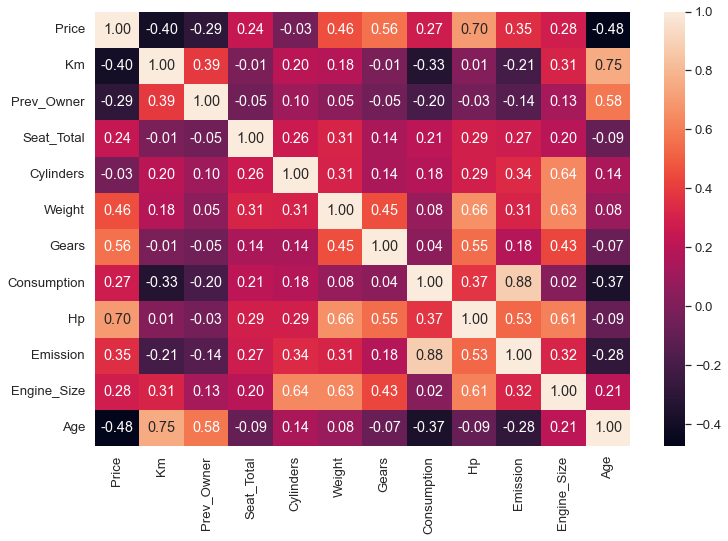

In [4]:
sns.heatmap(df.corr(), annot=True ,fmt=".2f")

#### Km

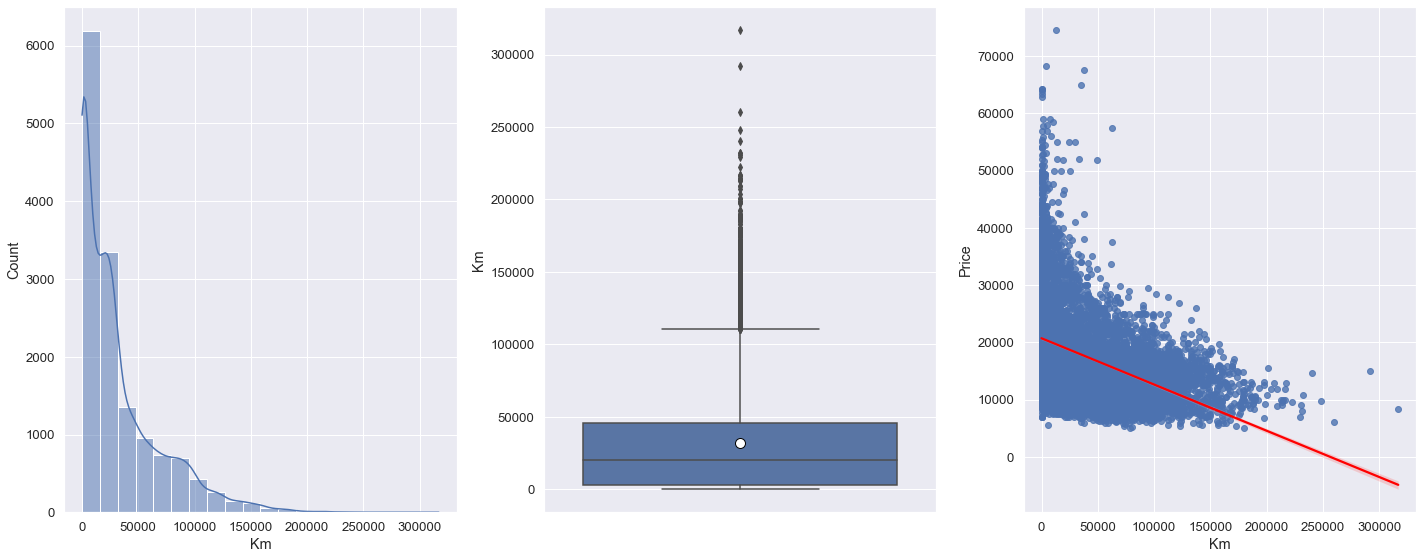

In [5]:
fig, ax = plt.subplots(1,3, figsize = (20,8))
sns.histplot(df["Km"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            y="Km",
            showmeans=True,
            ax=ax[1],
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
sns.regplot(x="Km", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [6]:
df.corr()["Km"]

Price         -0.401062
Km             1.000000
Prev_Owner     0.392964
Seat_Total    -0.012104
Cylinders      0.201693
Weight         0.180797
Gears         -0.010586
Consumption   -0.332332
Hp             0.014107
Emission      -0.210887
Engine_Size    0.310522
Age            0.752683
Name: Km, dtype: float64

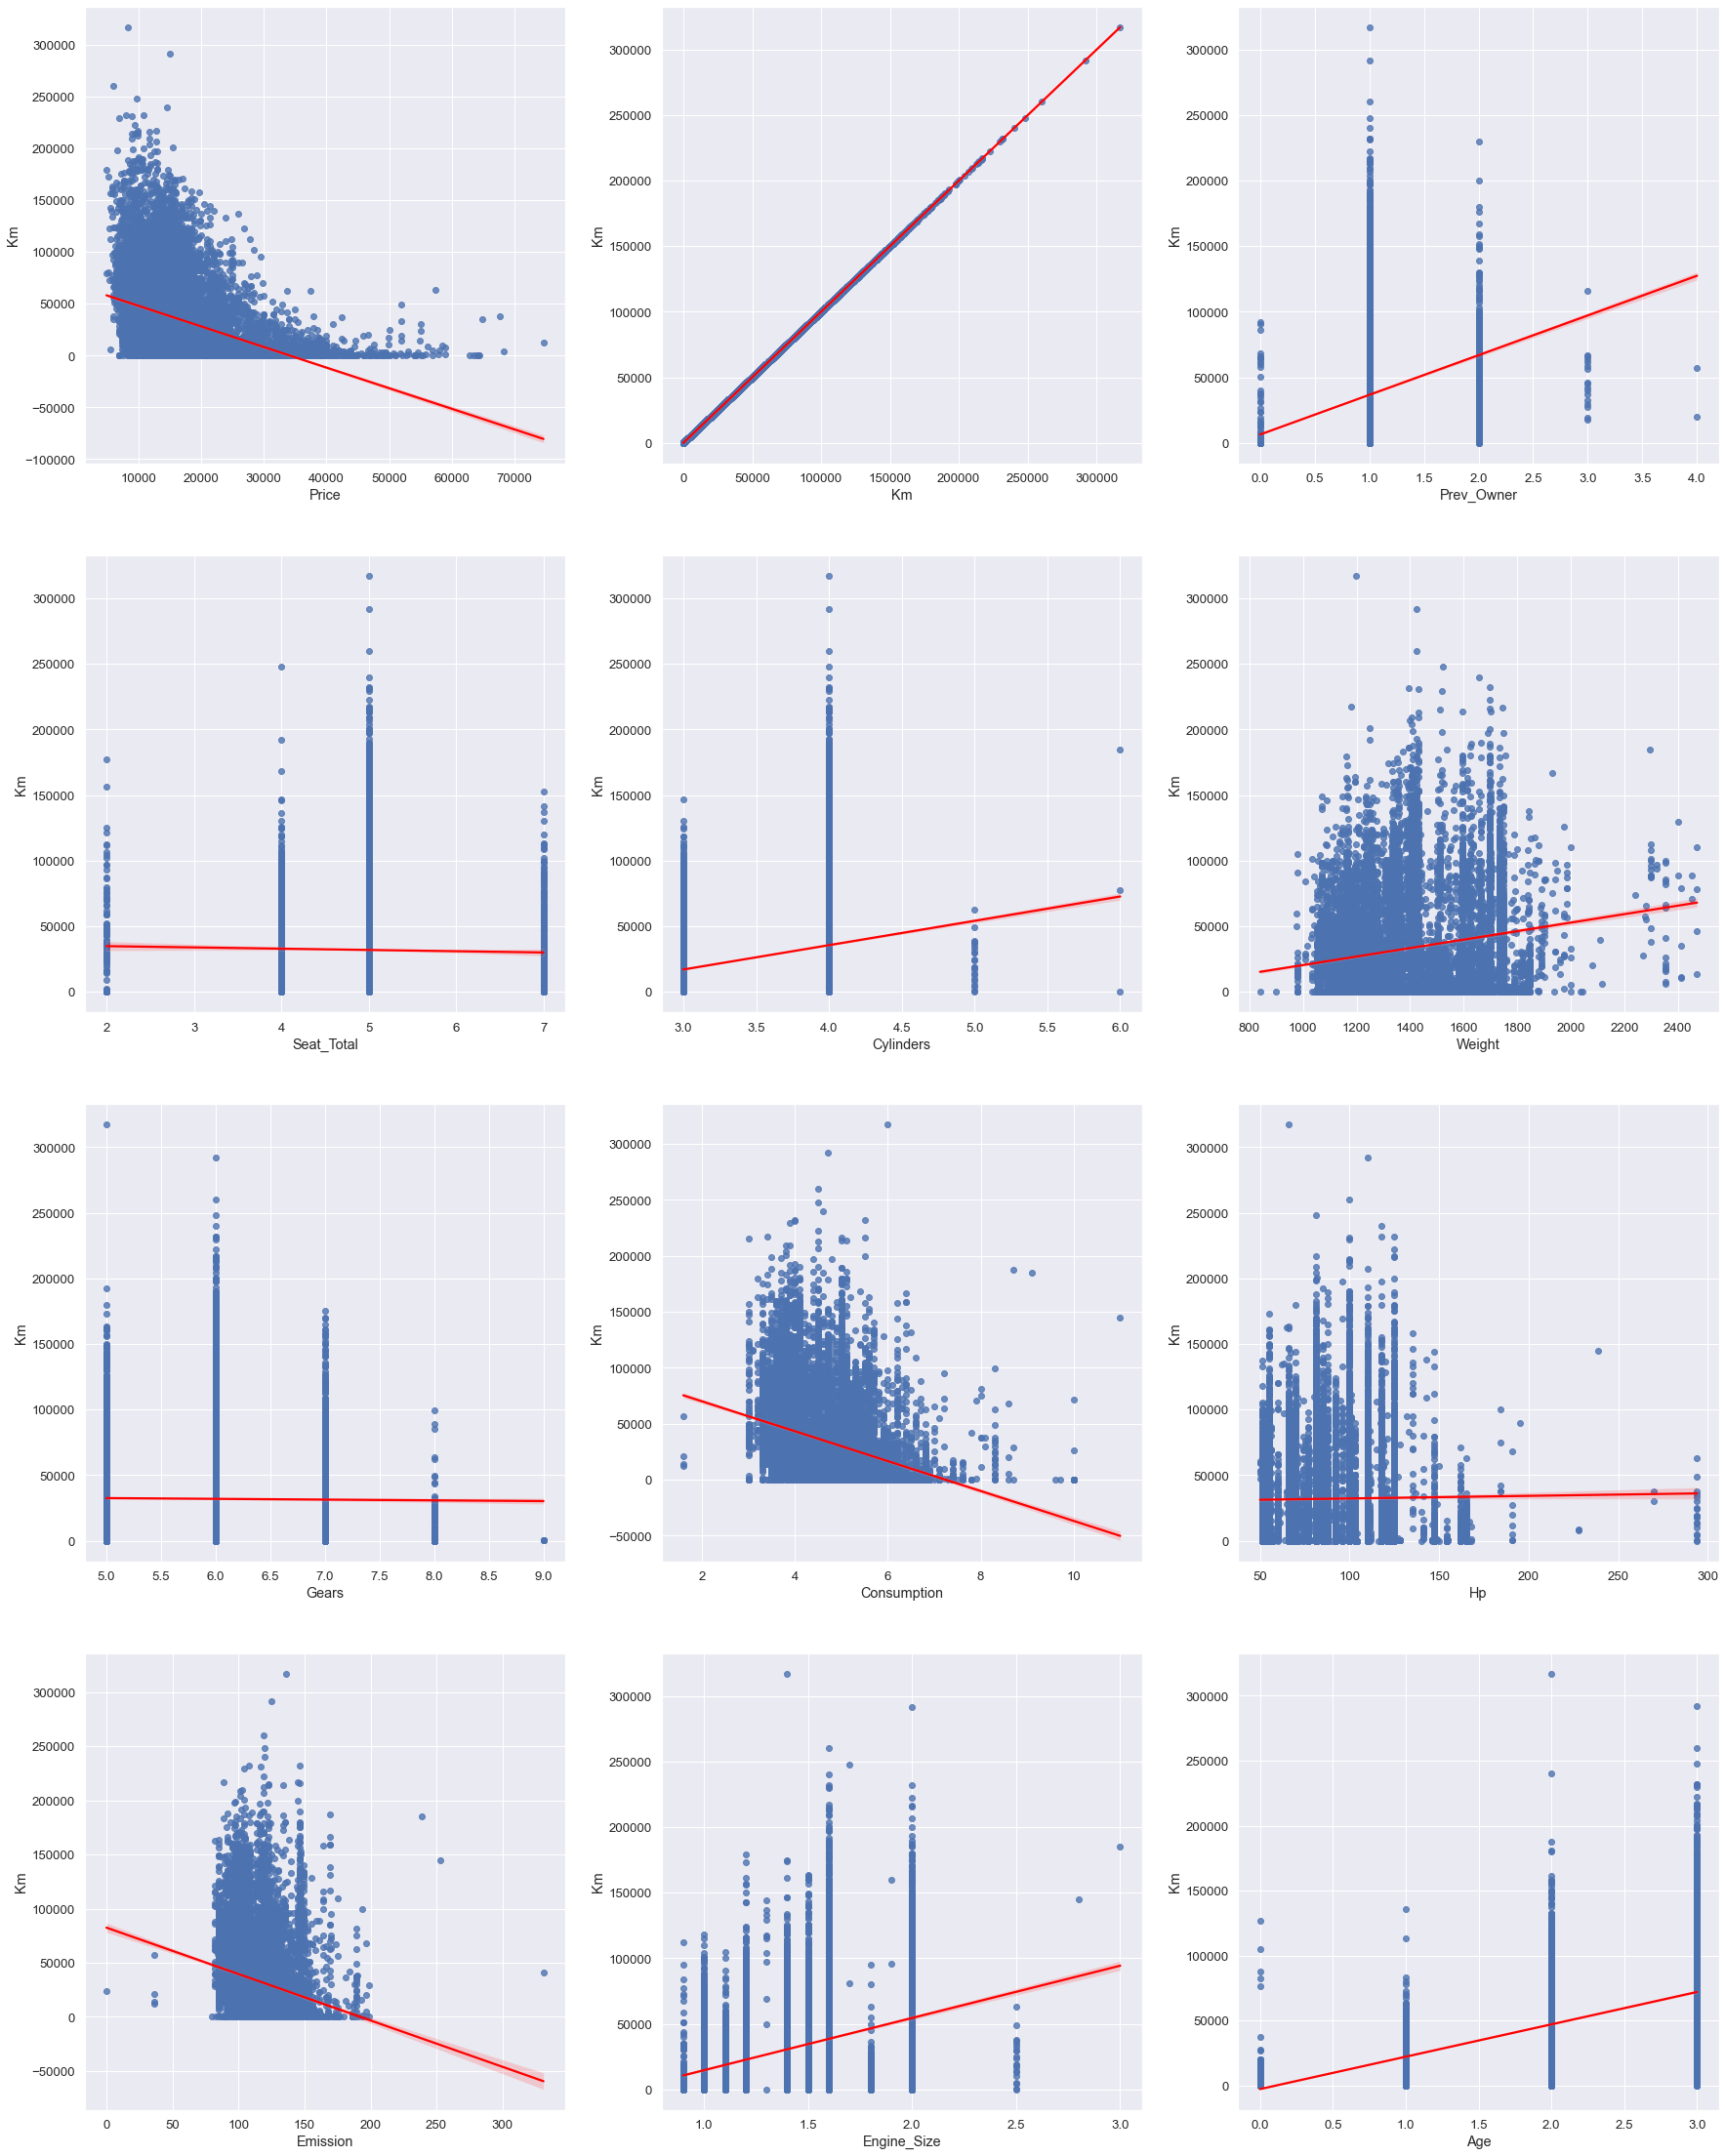

In [7]:
fig = plt.figure(figsize=(30,50))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
        plt.subplot(5,3,i+1)
        sns.regplot(x=col, y= "Km", data=df, line_kws={"color": "red"})

#### Prev_Owner

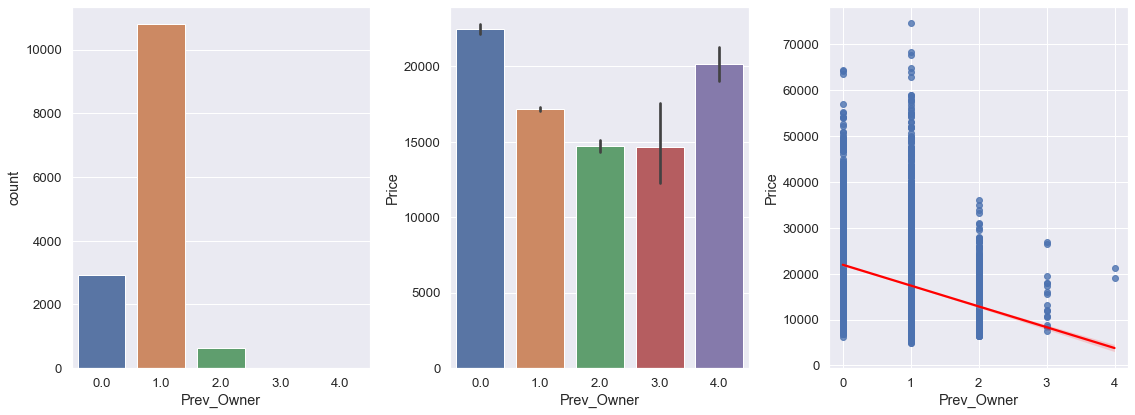

In [8]:
fig, ax = plt.subplots(1,3, figsize = (16,6))
sns.countplot(df["Prev_Owner"],ax=ax[0]);
sns.barplot(x="Prev_Owner", y="Price", data=df, ax=ax[1]);
sns.regplot(x="Prev_Owner", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

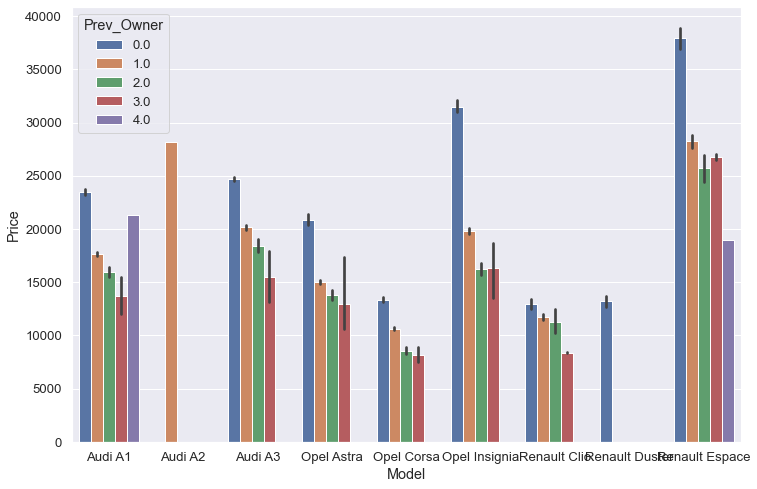

In [9]:
sns.barplot(x="Model", y="Price", data=df, hue="Prev_Owner");

In [10]:
df.corr()["Prev_Owner"]

Price         -0.292504
Km             0.392964
Prev_Owner     1.000000
Seat_Total    -0.052952
Cylinders      0.100721
Weight         0.046111
Gears         -0.052274
Consumption   -0.195217
Hp            -0.034429
Emission      -0.142084
Engine_Size    0.130032
Age            0.584254
Name: Prev_Owner, dtype: float64

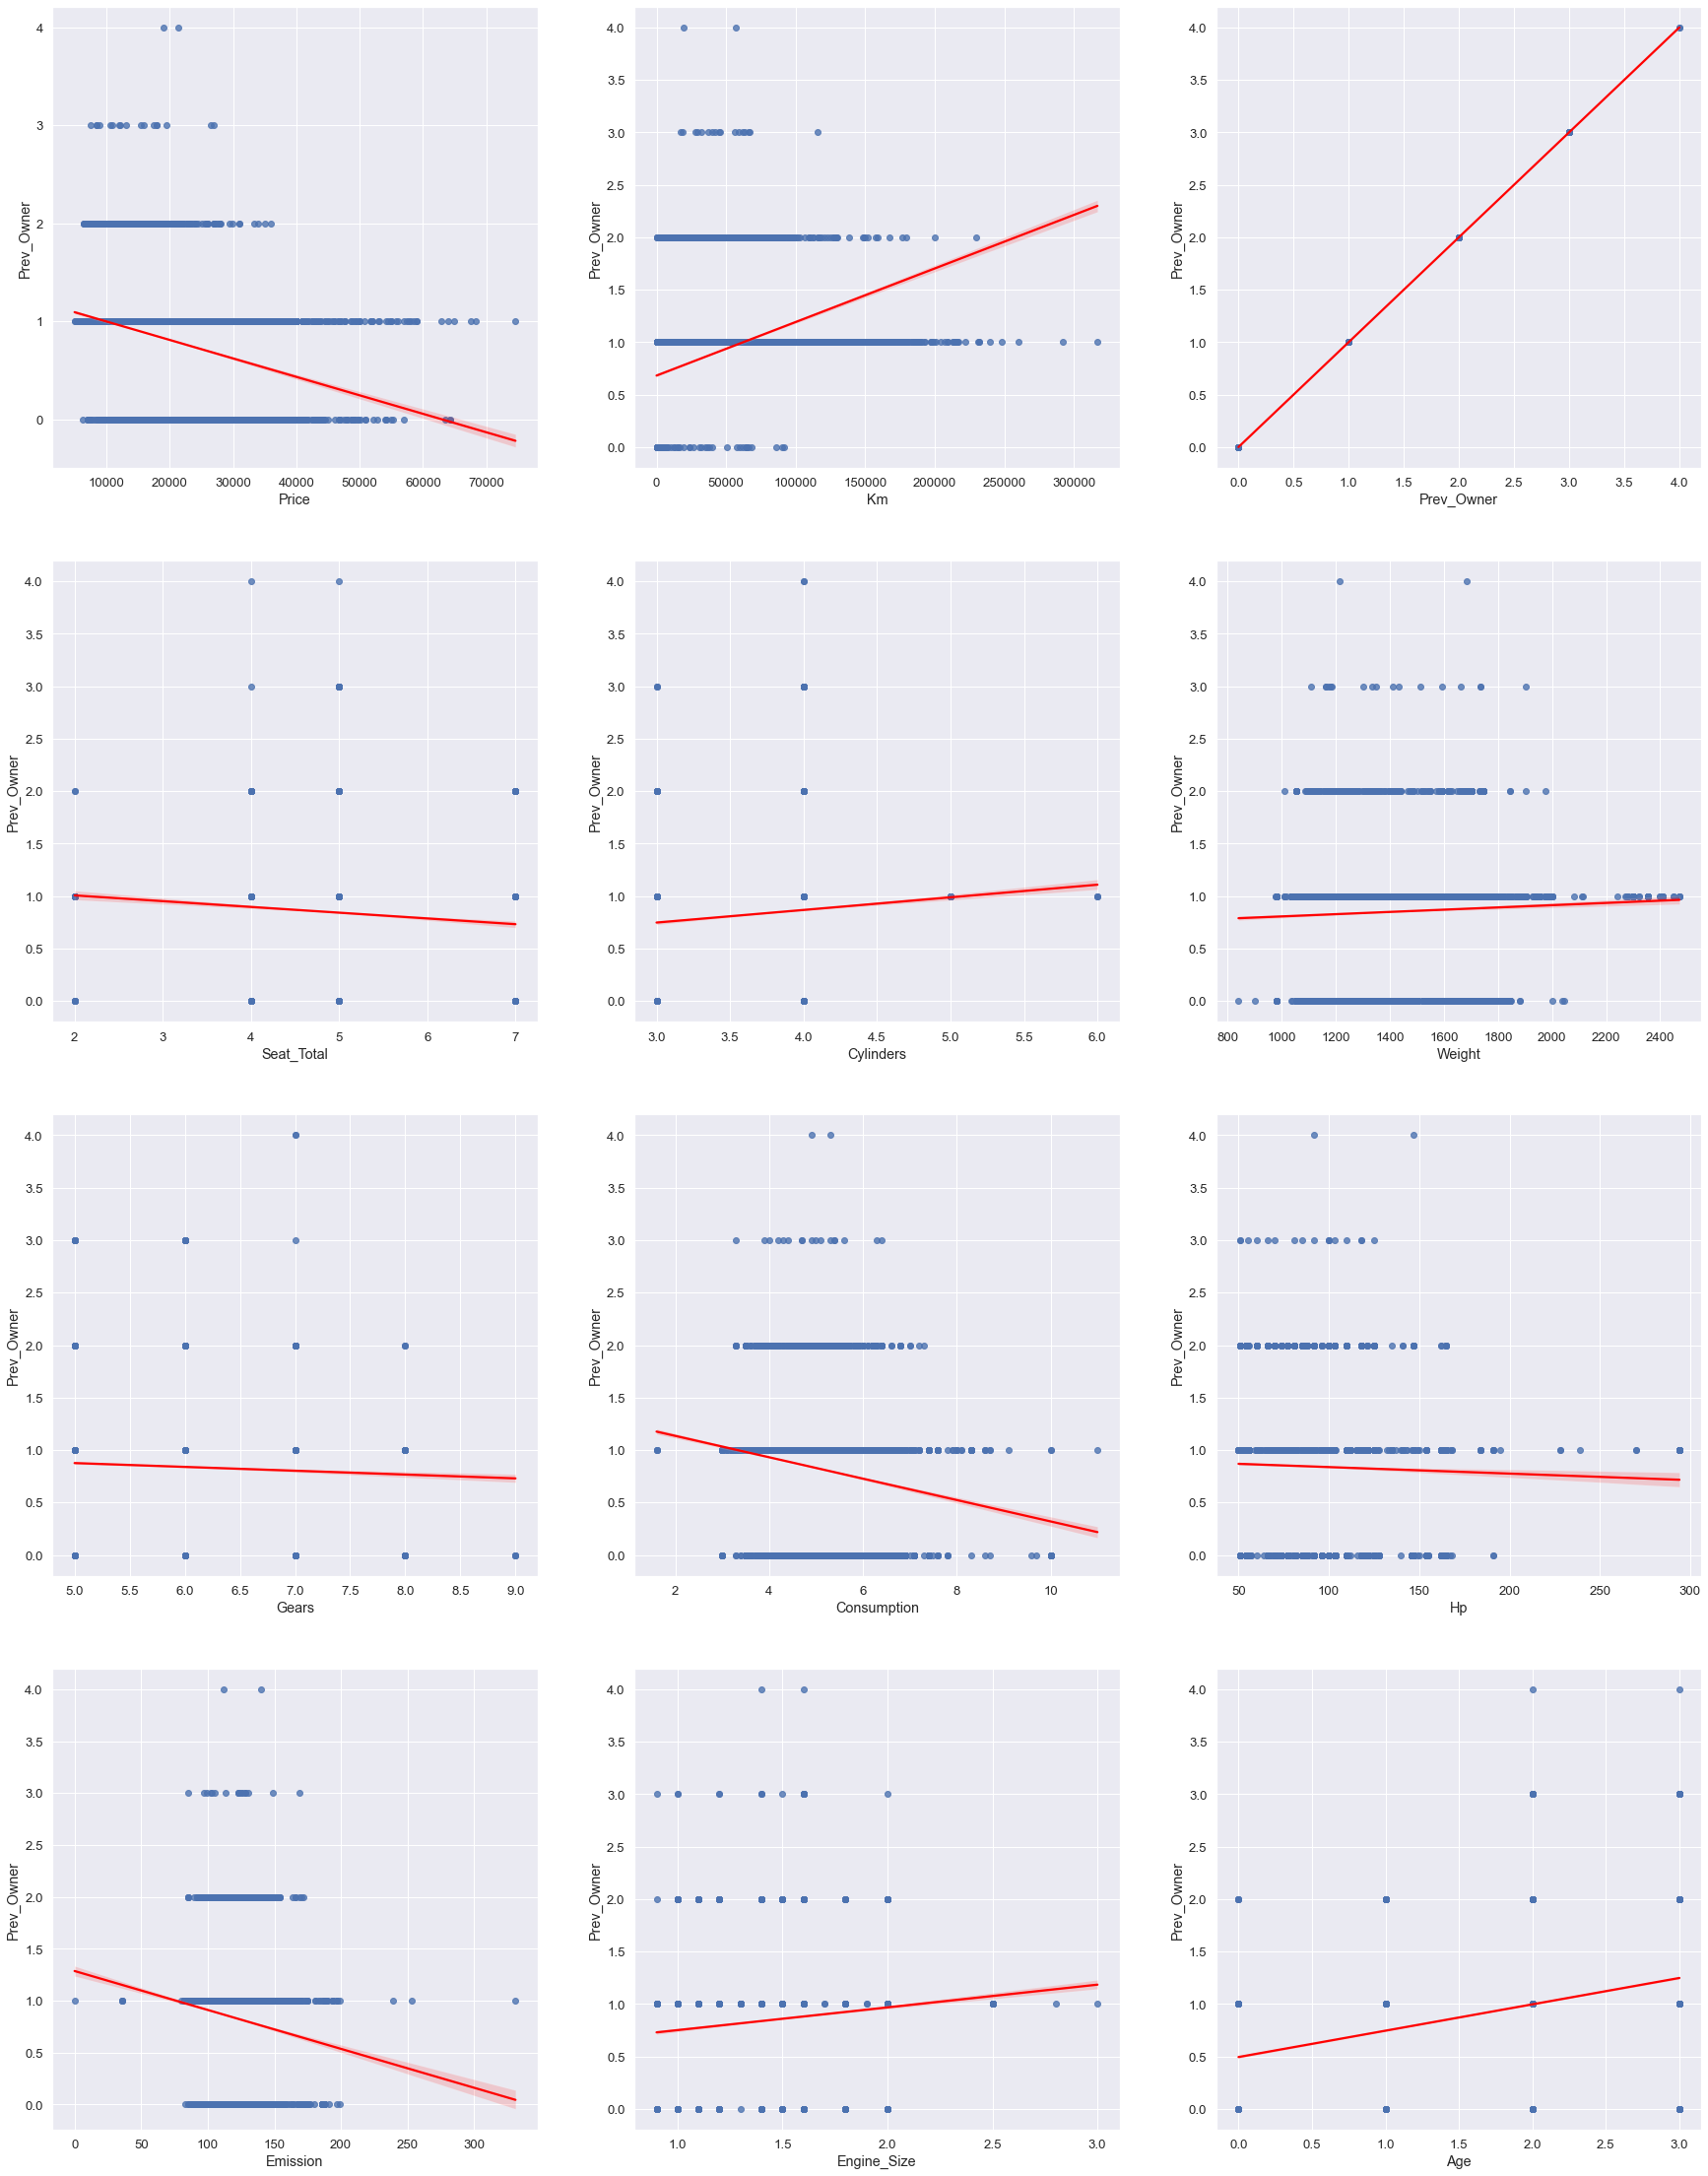

In [11]:
fig = plt.figure(figsize=(30,50))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
        plt.subplot(5,3,i+1)
        sns.regplot(x=col, y= "Prev_Owner", data=df, line_kws={"color": "red"})

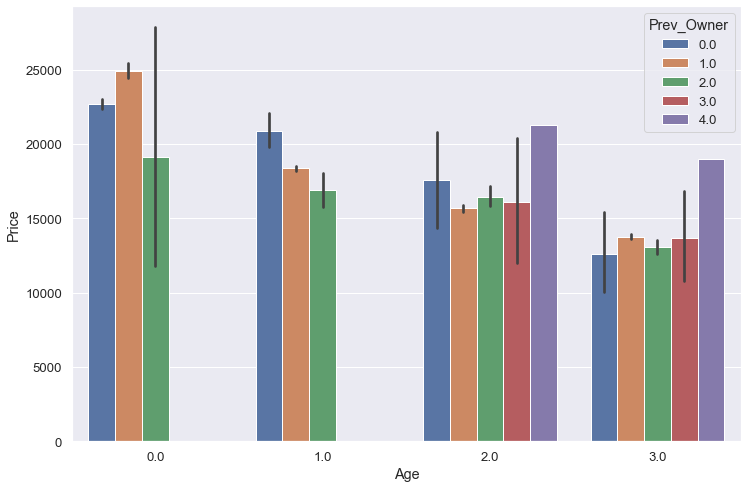

In [12]:
sns.barplot(x="Age", y="Price", data=df, hue="Prev_Owner");

#### Seat_Total

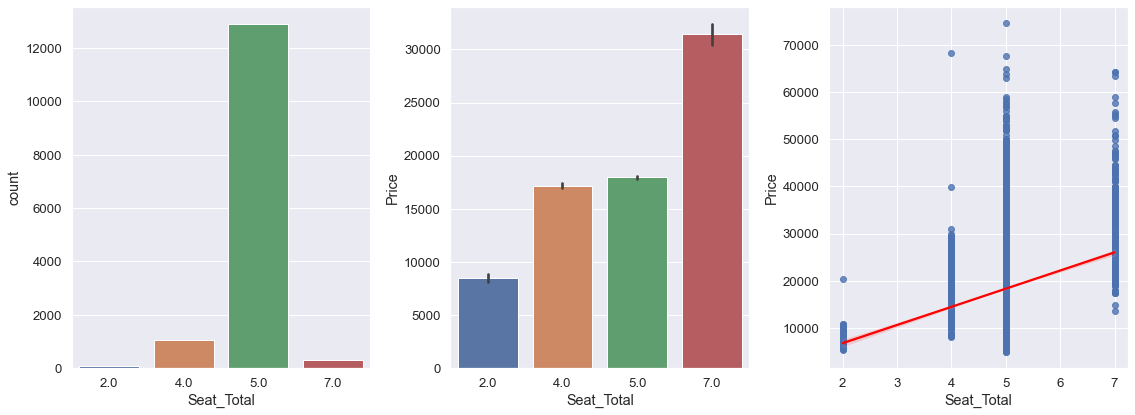

In [13]:
fig, ax = plt.subplots(1,3, figsize = (16,6))
sns.countplot(df["Seat_Total"],ax=ax[0]);
sns.barplot(x="Seat_Total", y="Price", data=df, ax=ax[1]);
sns.regplot(x="Seat_Total", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [14]:
df.corr()["Seat_Total"]

Price          0.239279
Km            -0.012104
Prev_Owner    -0.052952
Seat_Total     1.000000
Cylinders      0.256990
Weight         0.310893
Gears          0.142138
Consumption    0.209831
Hp             0.285988
Emission       0.269780
Engine_Size    0.197122
Age           -0.086097
Name: Seat_Total, dtype: float64

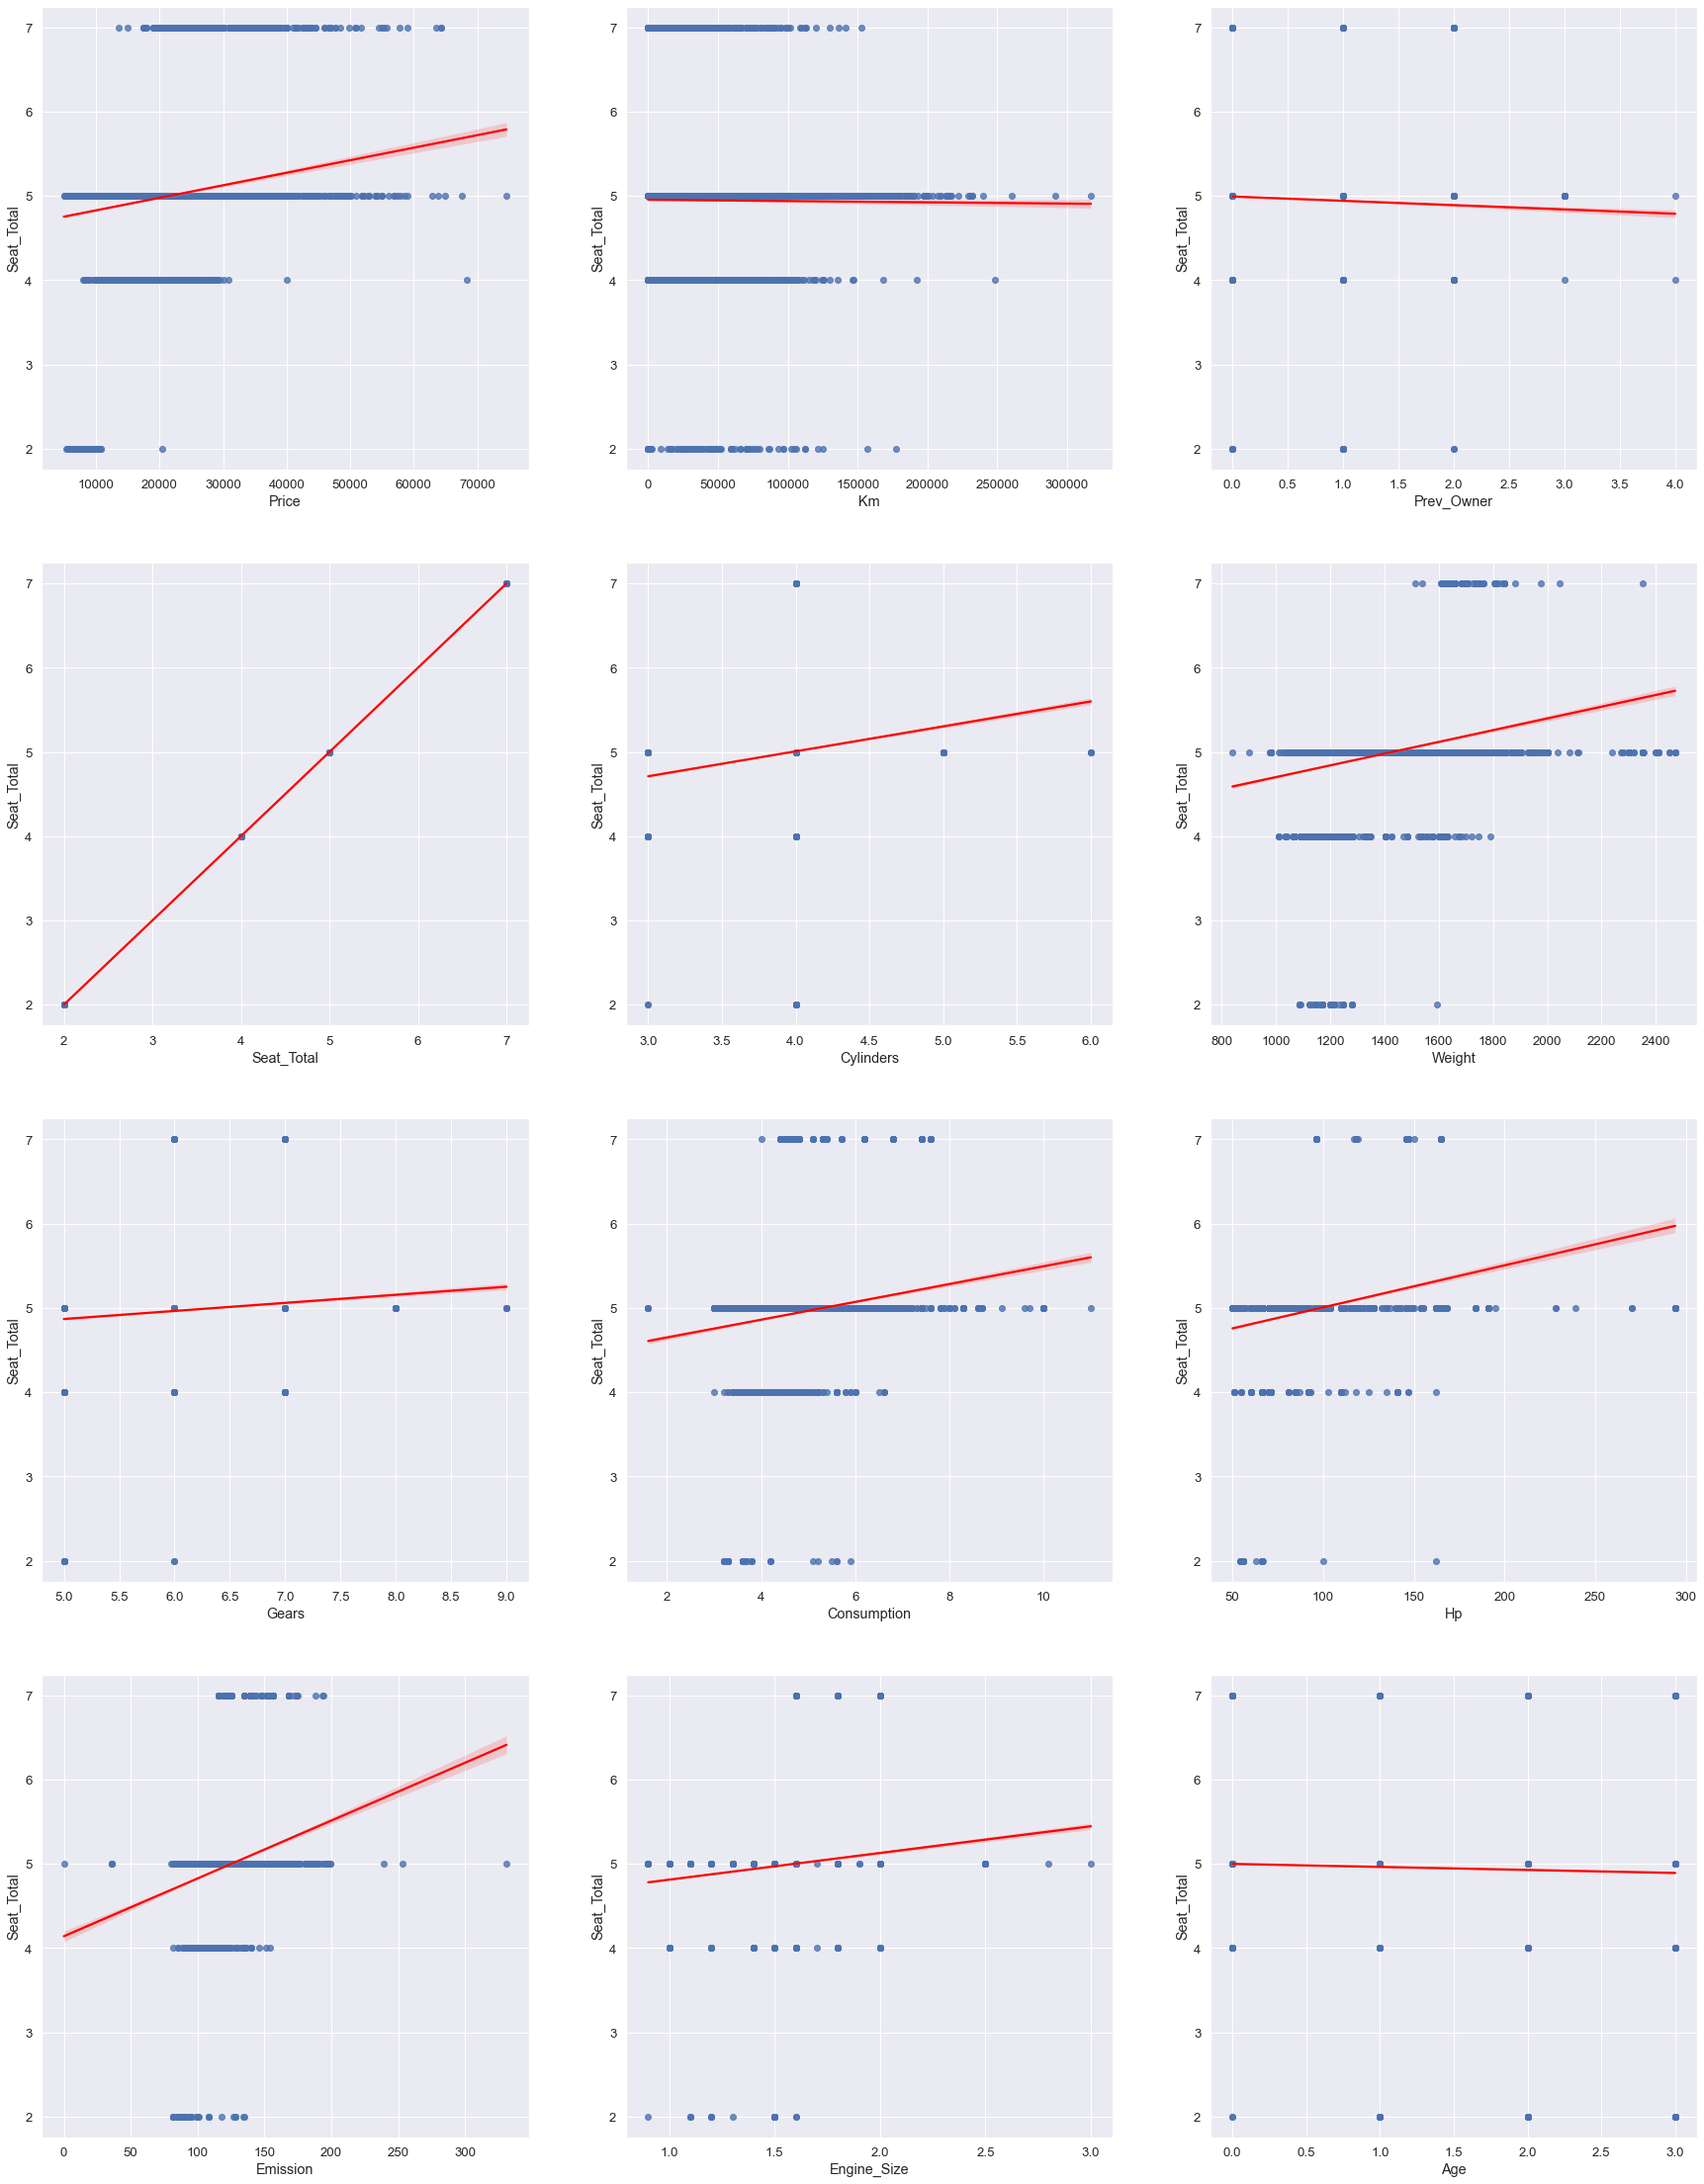

In [15]:
fig = plt.figure(figsize=(30,50))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
        plt.subplot(5,3,i+1)
        sns.regplot(x=col, y= "Seat_Total", data=df, line_kws={"color": "red"})

In [16]:
#According to corelation and graphs there is no enough relationship with (target feature) price
df.drop(columns="Seat_Total", inplace=True)

#### Cylinders

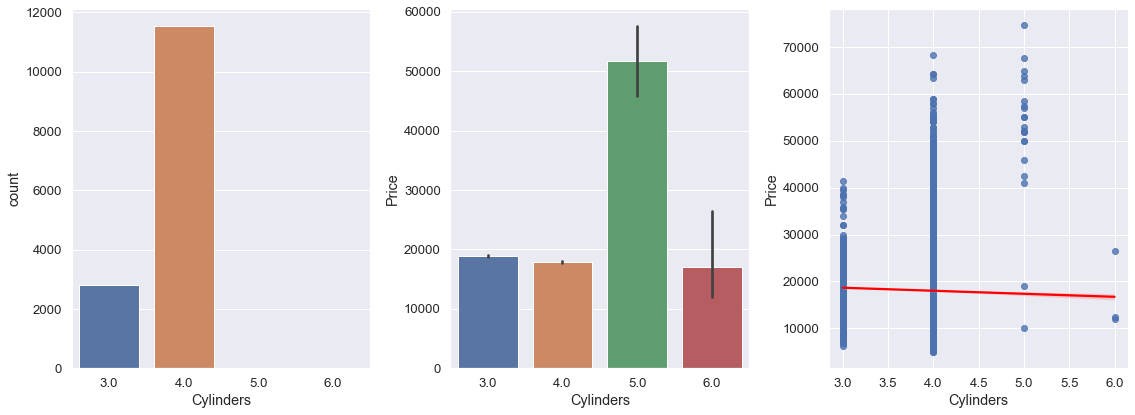

In [17]:
fig, ax = plt.subplots(1,3, figsize = (16,6))
sns.countplot(df["Cylinders"],ax=ax[0]);
sns.barplot(x="Cylinders", y="Price", data=df, ax=ax[1]);
sns.regplot(x="Cylinders", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

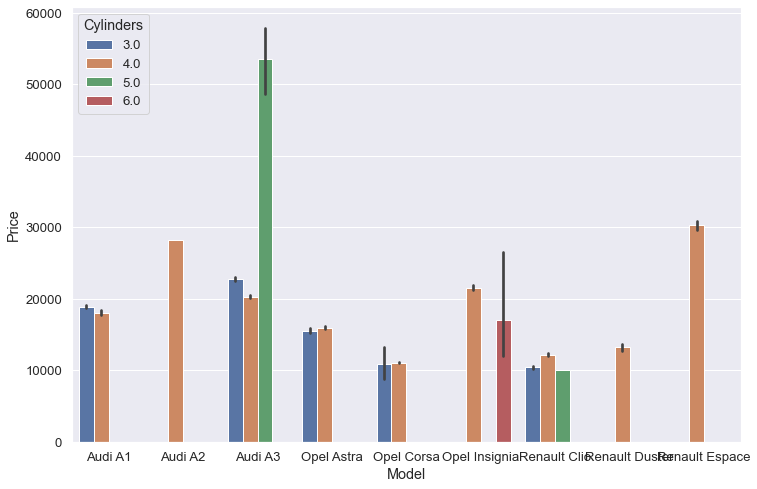

In [18]:
sns.barplot(x="Model", y="Price", hue="Cylinders" ,data=df);

In [19]:
df.corr()["Cylinders"]

Price         -0.034848
Km             0.201693
Prev_Owner     0.100721
Cylinders      1.000000
Weight         0.305229
Gears          0.141952
Consumption    0.184004
Hp             0.285424
Emission       0.335438
Engine_Size    0.636504
Age            0.142588
Name: Cylinders, dtype: float64

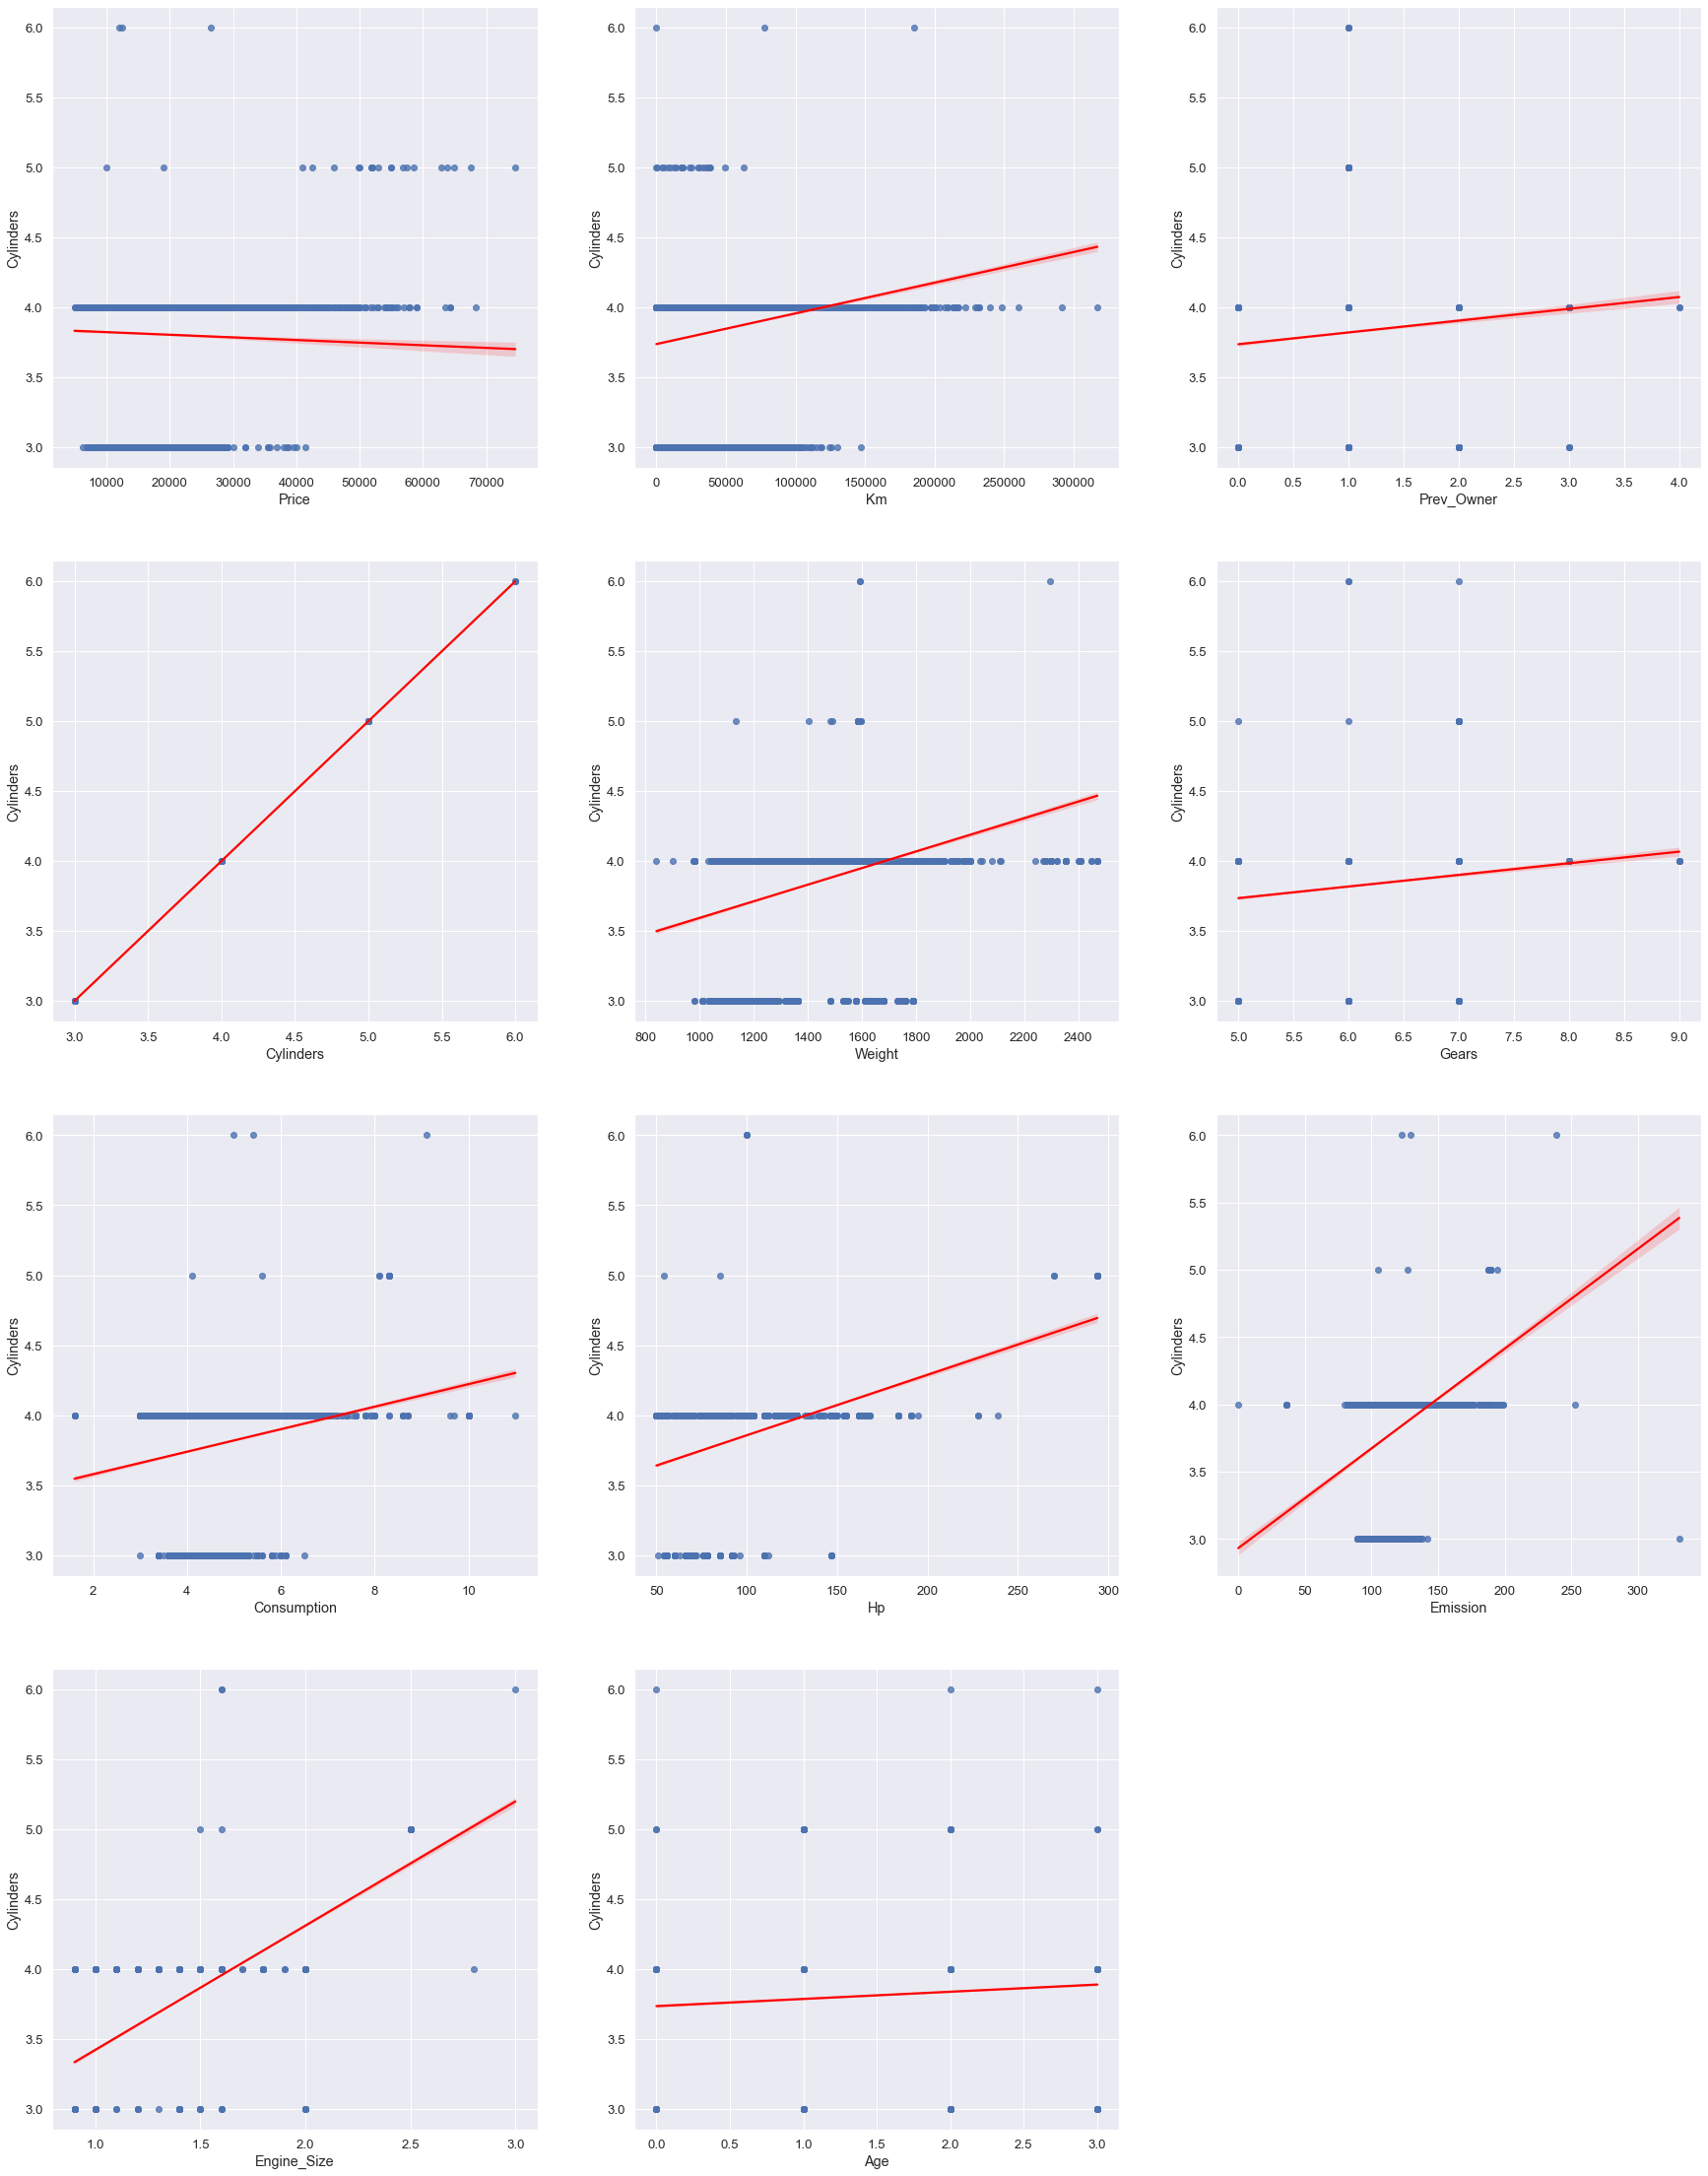

In [20]:
fig = plt.figure(figsize=(30,50))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
        plt.subplot(5,3,i+1)
        sns.regplot(x=col, y= "Cylinders", data=df, line_kws={"color": "red"})

In [21]:
#According to corelation and graphs there is no enough relationship with (target feature) price
df.drop(columns="Cylinders", inplace=True)

#### Weight

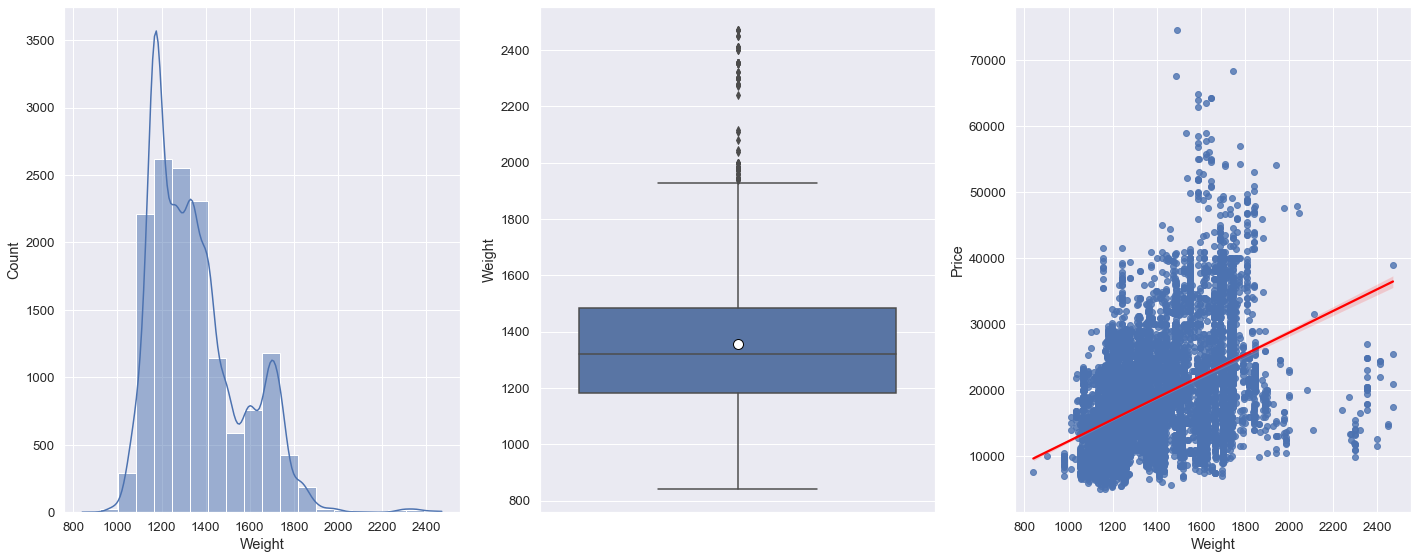

In [22]:
fig, ax = plt.subplots(1,3, figsize = (20,8))
sns.histplot(df["Weight"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            y="Weight",
            showmeans=True,
            ax=ax[1],
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
sns.regplot(x="Weight", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [23]:
df.corr()["Weight"]

Price          0.456534
Km             0.180797
Prev_Owner     0.046111
Weight         1.000000
Gears          0.454366
Consumption    0.079737
Hp             0.662974
Emission       0.309198
Engine_Size    0.632564
Age            0.084900
Name: Weight, dtype: float64

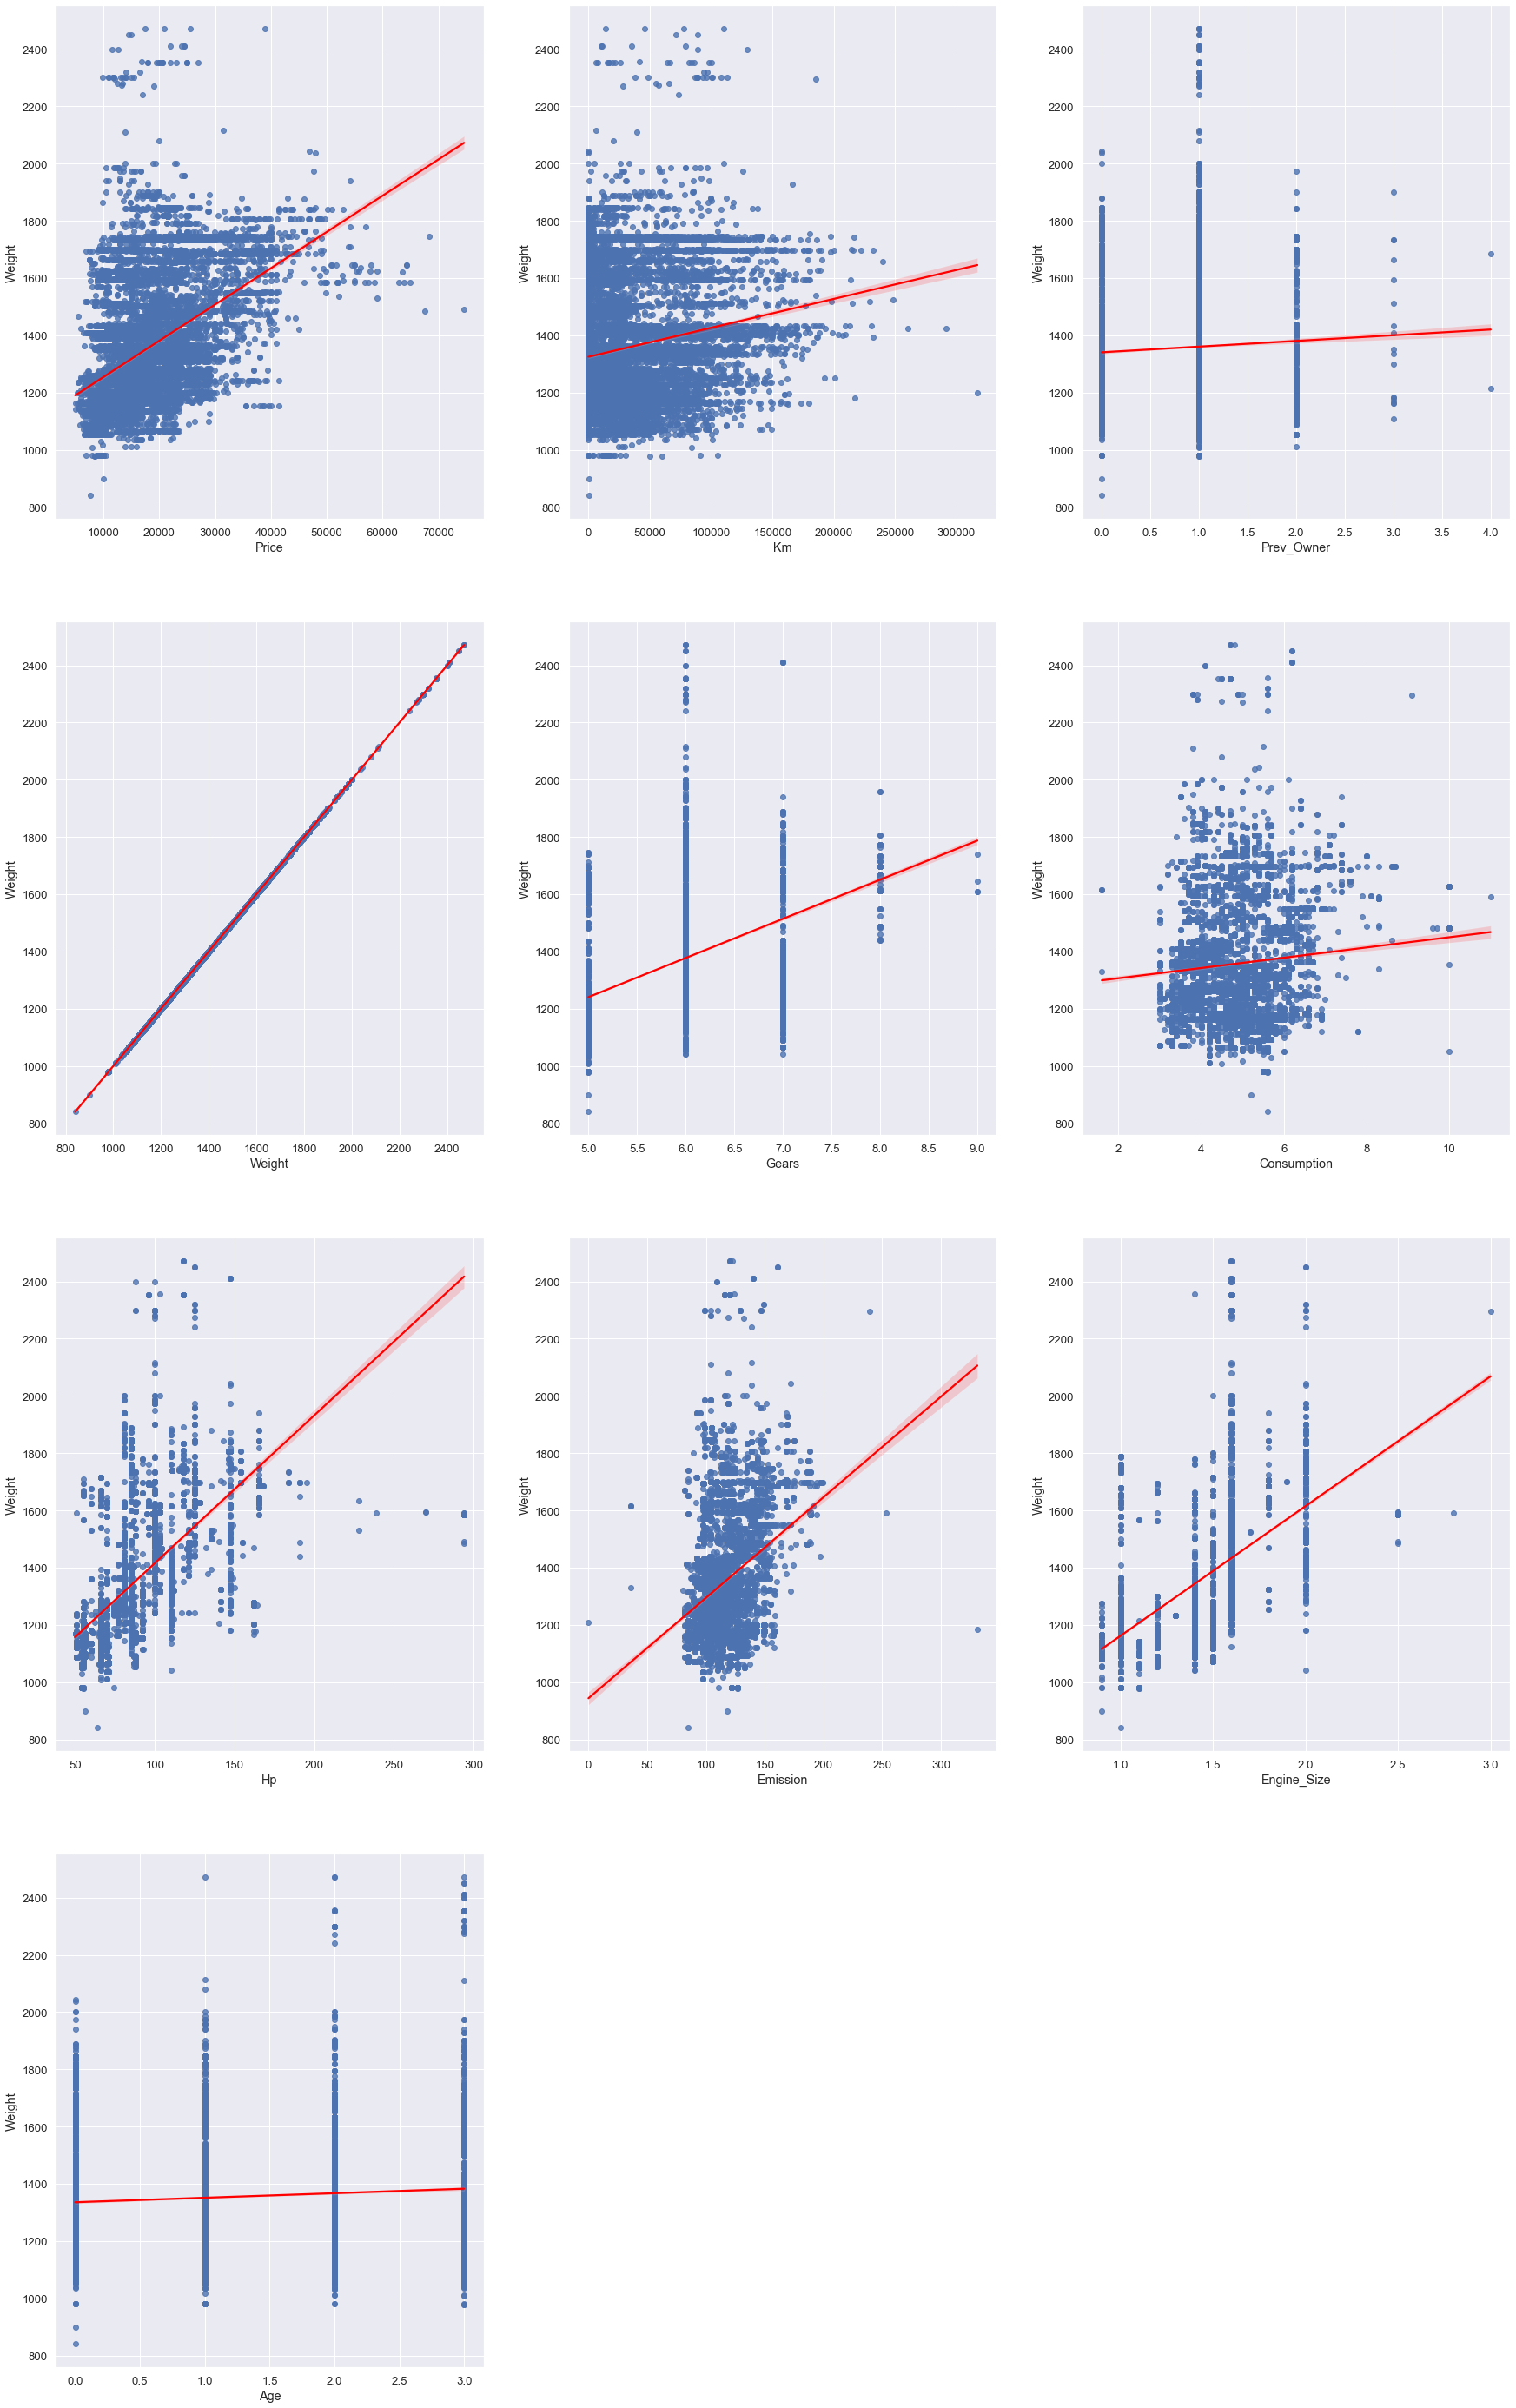

In [24]:
fig = plt.figure(figsize=(30,50))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
        plt.subplot(4,3,i+1)
        sns.regplot(x=col, y= "Weight", data=df, line_kws={"color": "red"})

#### Gears

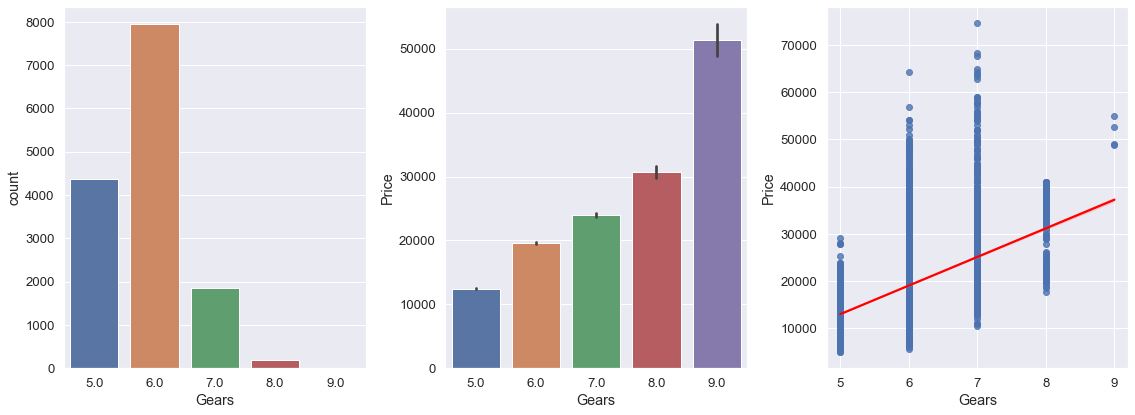

In [25]:
fig, ax = plt.subplots(1,3, figsize = (16,6))
sns.countplot(df["Gears"],ax=ax[0]);
sns.barplot(x="Gears", y="Price", data=df, ax=ax[1]);
sns.regplot(x="Gears", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [26]:
df.corr()["Gears"]

Price          0.559169
Km            -0.010586
Prev_Owner    -0.052274
Weight         0.454366
Gears          1.000000
Consumption    0.043333
Hp             0.547615
Emission       0.180311
Engine_Size    0.431304
Age           -0.073051
Name: Gears, dtype: float64

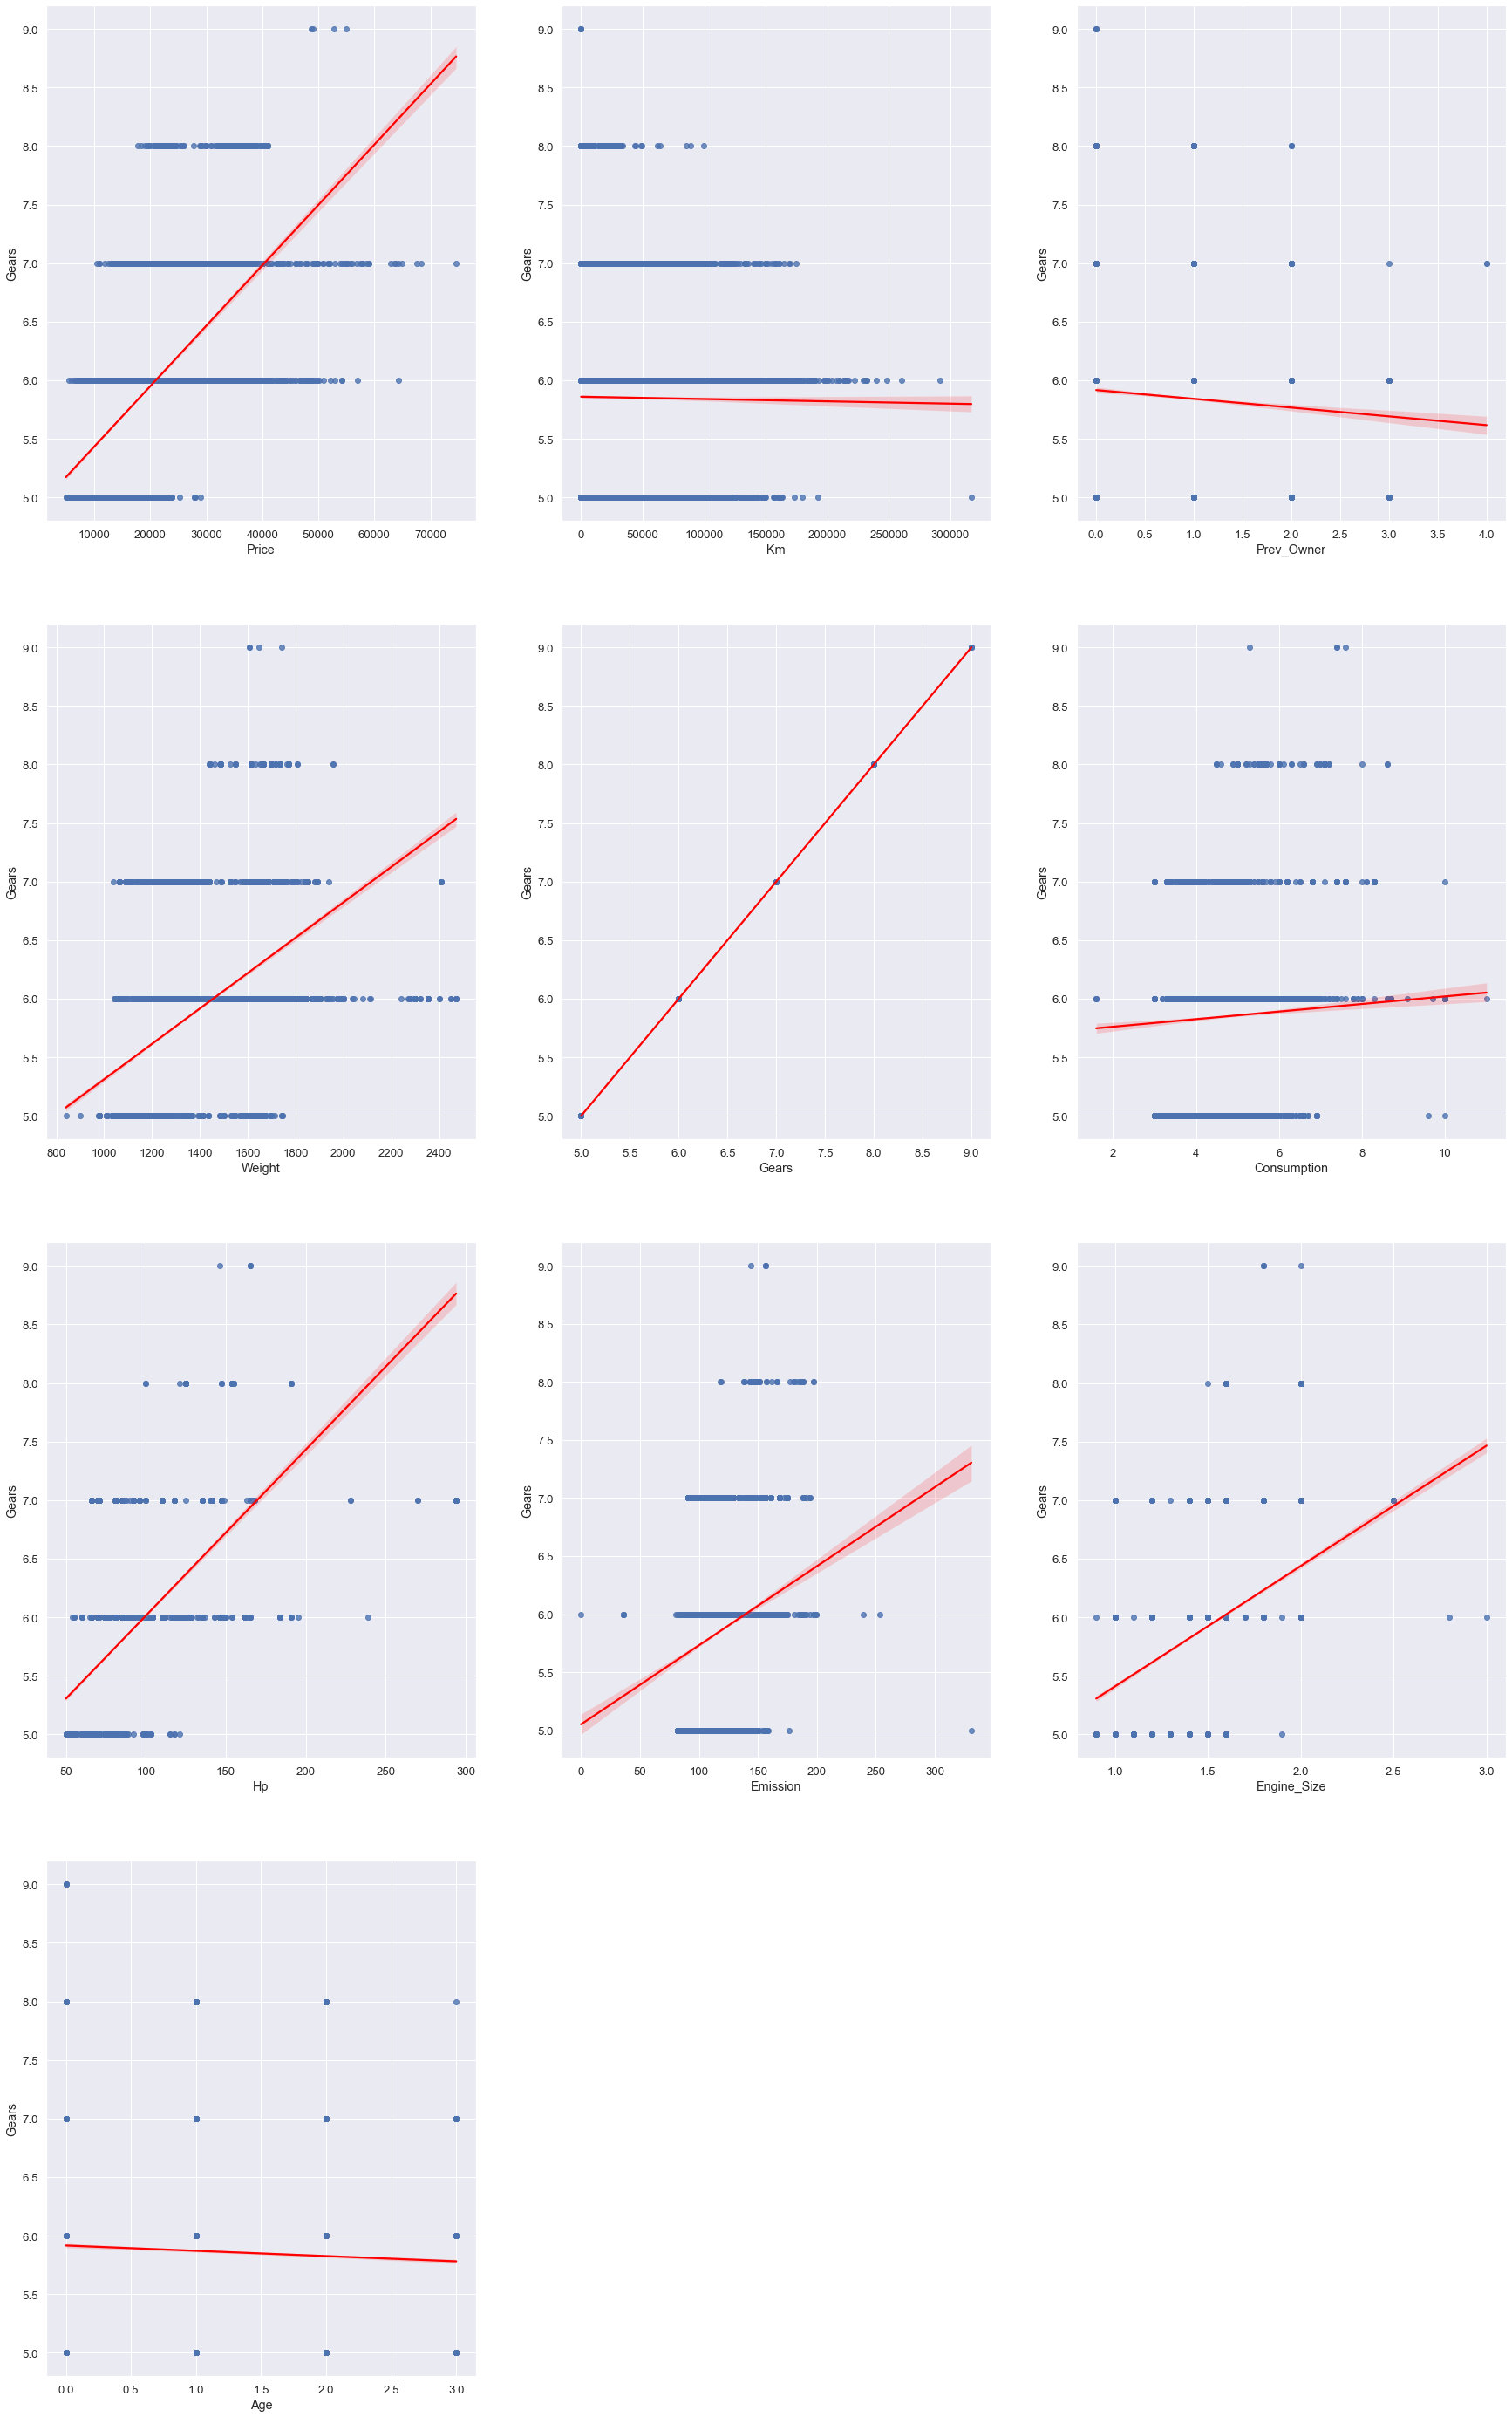

In [27]:
fig = plt.figure(figsize=(30,50))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
        plt.subplot(4,3,i+1)
        sns.regplot(x=col, y= "Gears", data=df, line_kws={"color": "red"})

#### Consumption

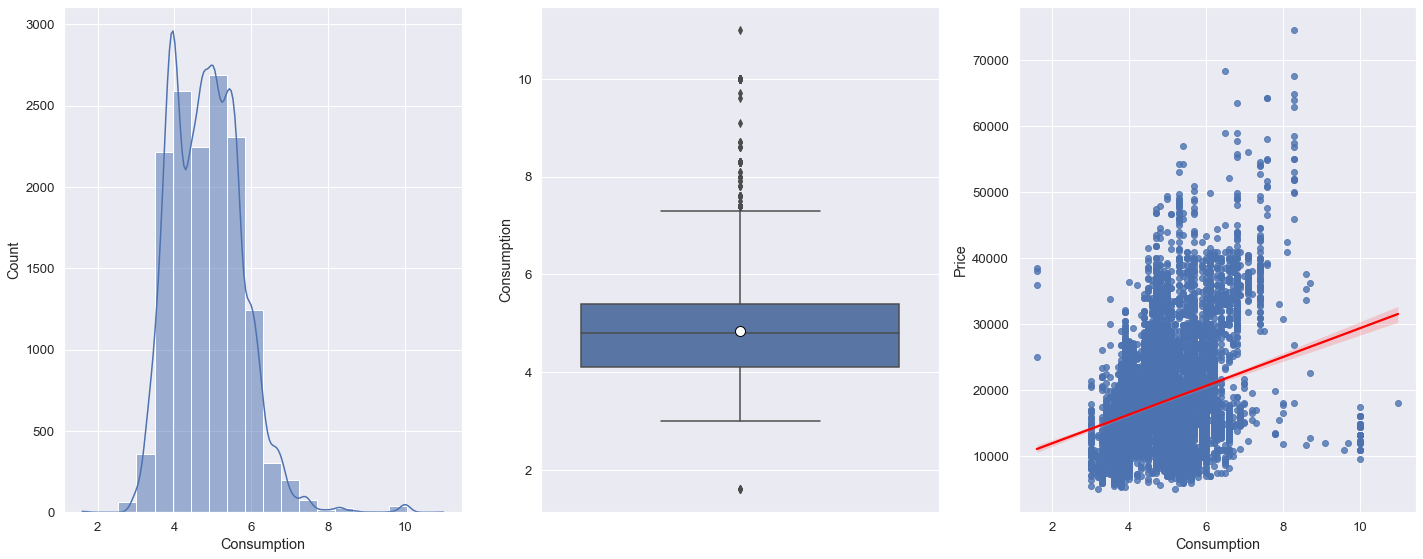

In [28]:
fig, ax = plt.subplots(1,3, figsize = (20,8))
sns.histplot(df["Consumption"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            y="Consumption",
            showmeans=True,
            ax=ax[1],
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
sns.regplot(x="Consumption", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [29]:
df.corr()["Consumption"]

Price          0.268803
Km            -0.332332
Prev_Owner    -0.195217
Weight         0.079737
Gears          0.043333
Consumption    1.000000
Hp             0.373487
Emission       0.882408
Engine_Size    0.021262
Age           -0.371157
Name: Consumption, dtype: float64

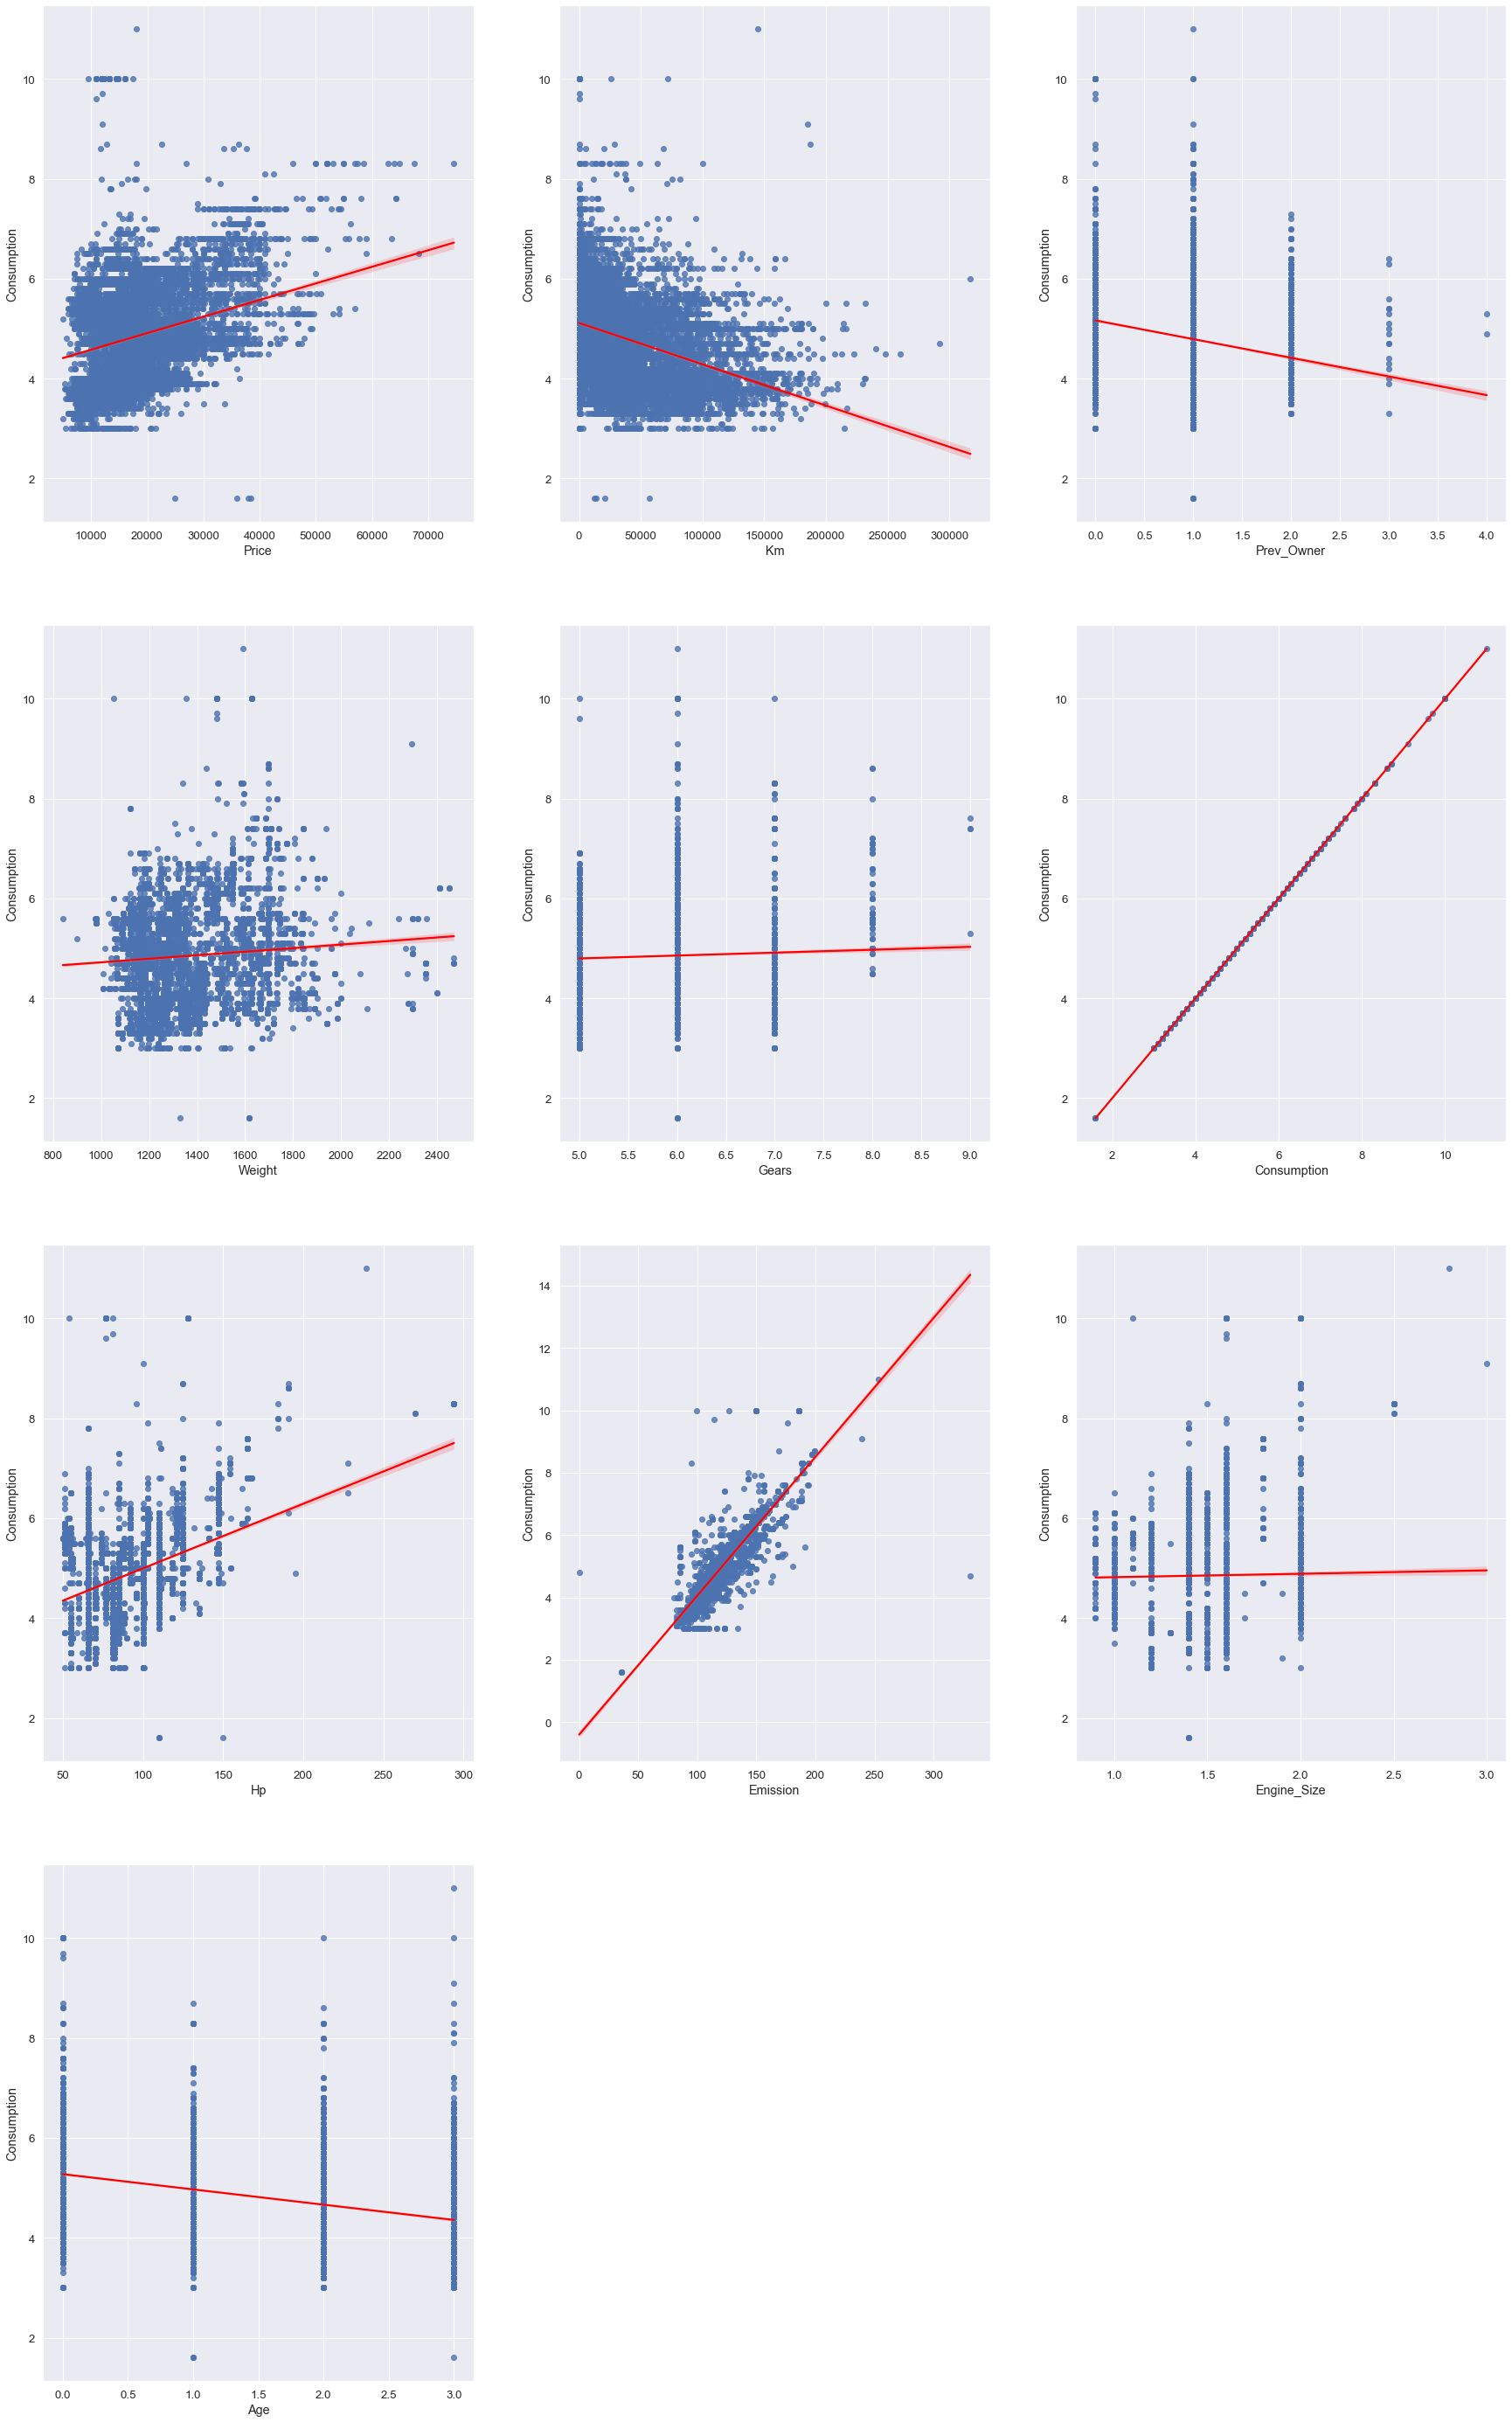

In [30]:
fig = plt.figure(figsize=(30,50))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
        plt.subplot(4,3,i+1)
        sns.regplot(x=col, y= "Consumption", data=df, line_kws={"color": "red"})

In [31]:
df.drop(columns="Consumption", inplace=True)

#### Hp 

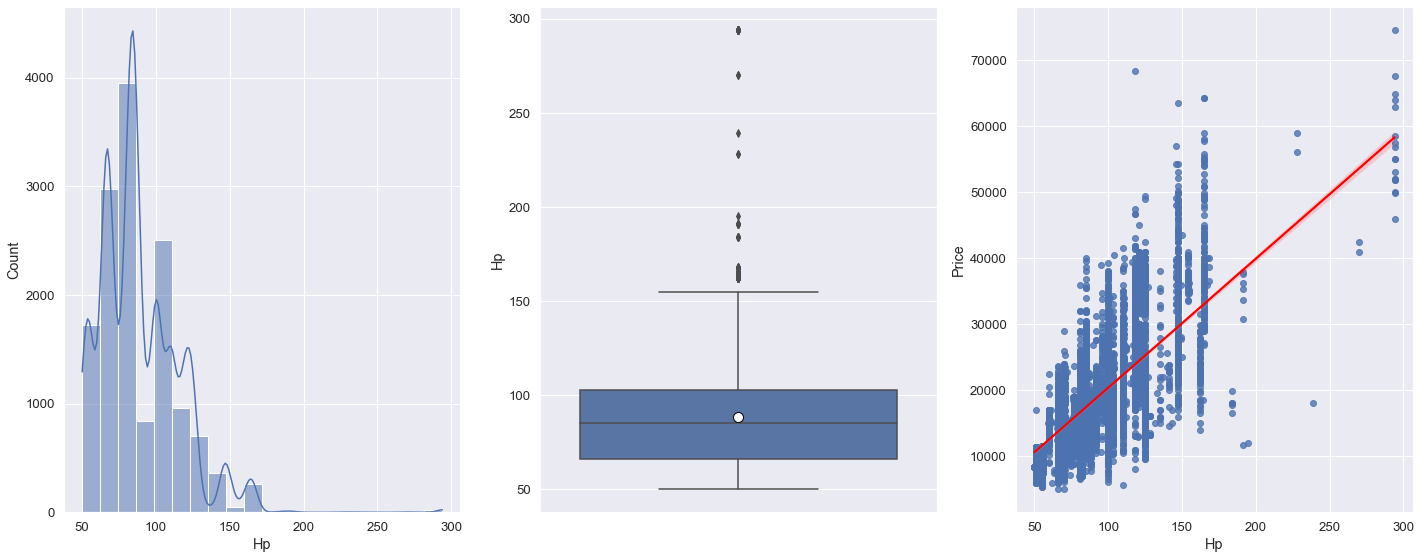

In [32]:
fig, ax = plt.subplots(1,3, figsize = (20,8))
sns.histplot(df["Hp"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            y="Hp",
            showmeans=True,
            ax=ax[1],
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
sns.regplot(x="Hp", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [33]:
df.corr()["Hp"]

Price          0.697264
Km             0.014107
Prev_Owner    -0.034429
Weight         0.662974
Gears          0.547615
Hp             1.000000
Emission       0.531089
Engine_Size    0.610323
Age           -0.088347
Name: Hp, dtype: float64

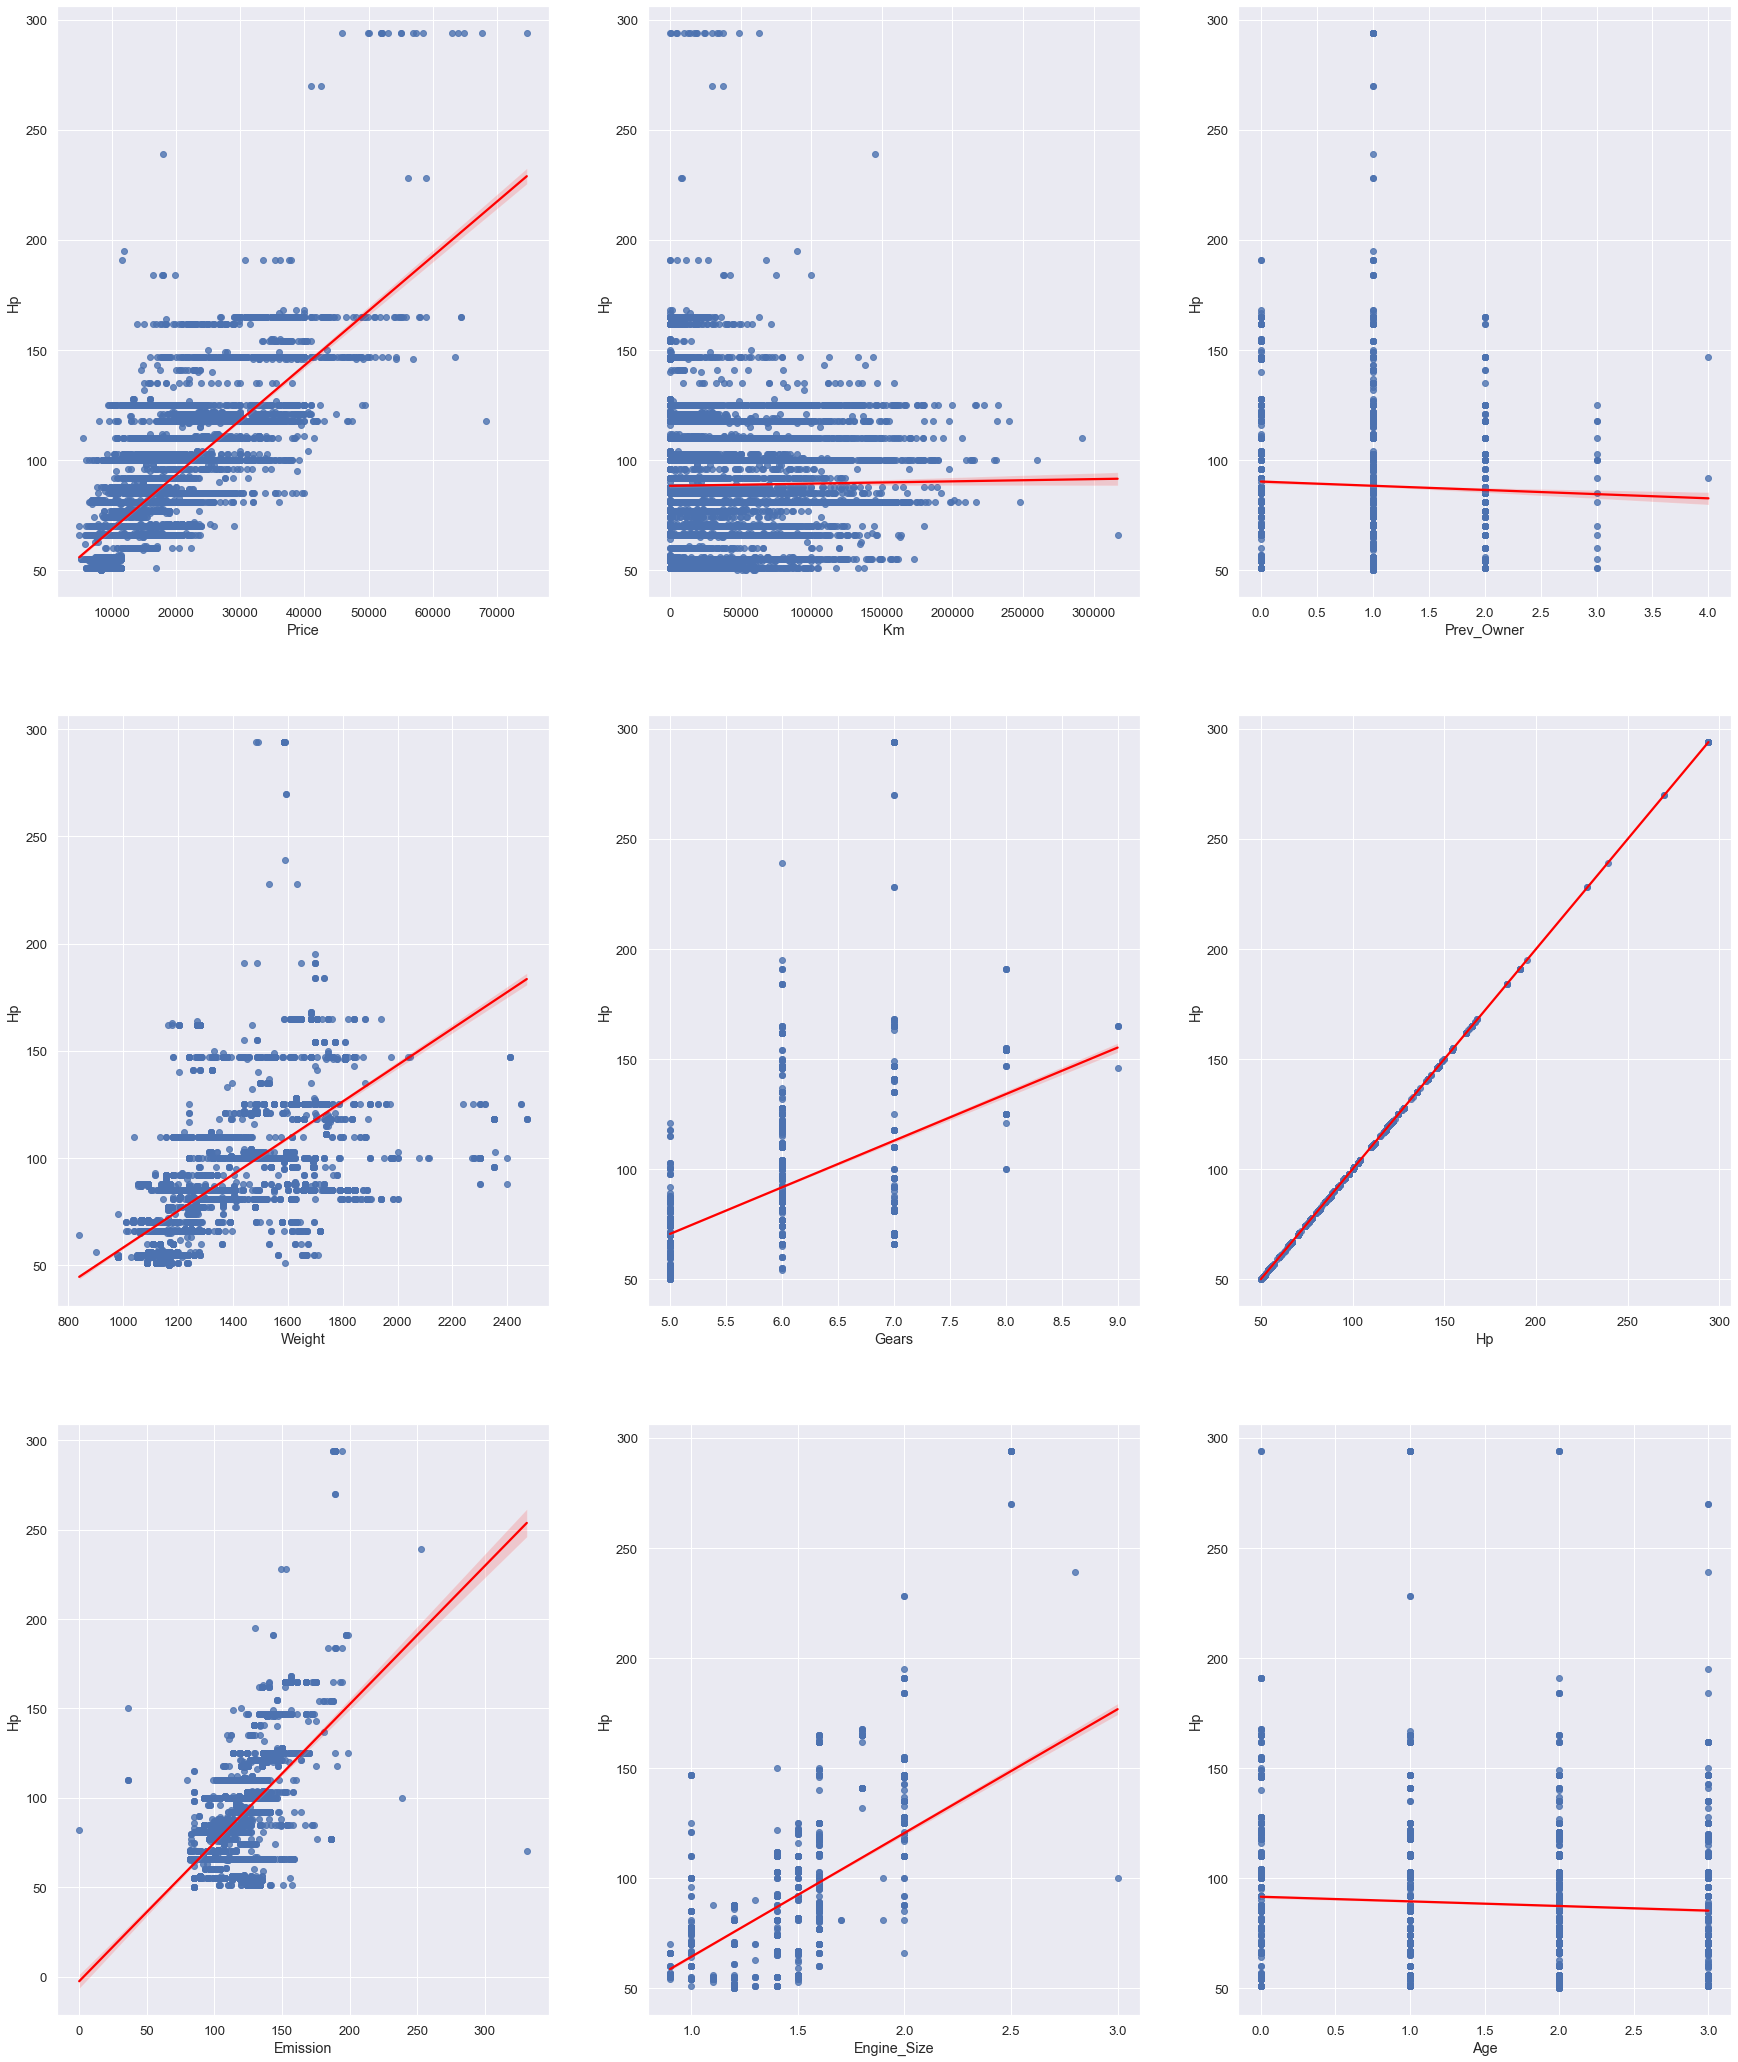

In [34]:
fig = plt.figure(figsize=(30,50))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
        plt.subplot(4,3,i+1)
        sns.regplot(x=col, y= "Hp", data=df, line_kws={"color": "red"})

#### Emission

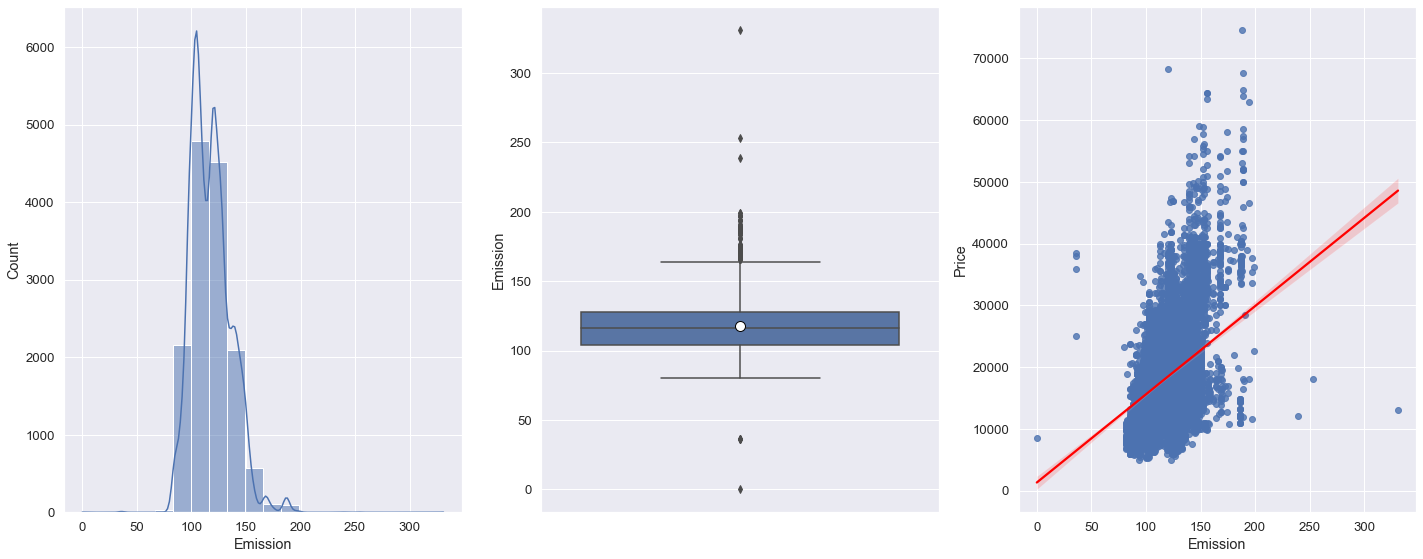

In [35]:
fig, ax = plt.subplots(1,3, figsize = (20,8))
sns.histplot(df["Emission"], kde=True, bins=20,ax=ax[0]);
sns.boxplot(data=df, 
            y="Emission",
            showmeans=True,
            ax=ax[1],
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
sns.regplot(x="Emission", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [36]:
df.corr()["Emission"]

Price          0.348837
Km            -0.210887
Prev_Owner    -0.142084
Weight         0.309198
Gears          0.180311
Hp             0.531089
Emission       1.000000
Engine_Size    0.317388
Age           -0.284438
Name: Emission, dtype: float64

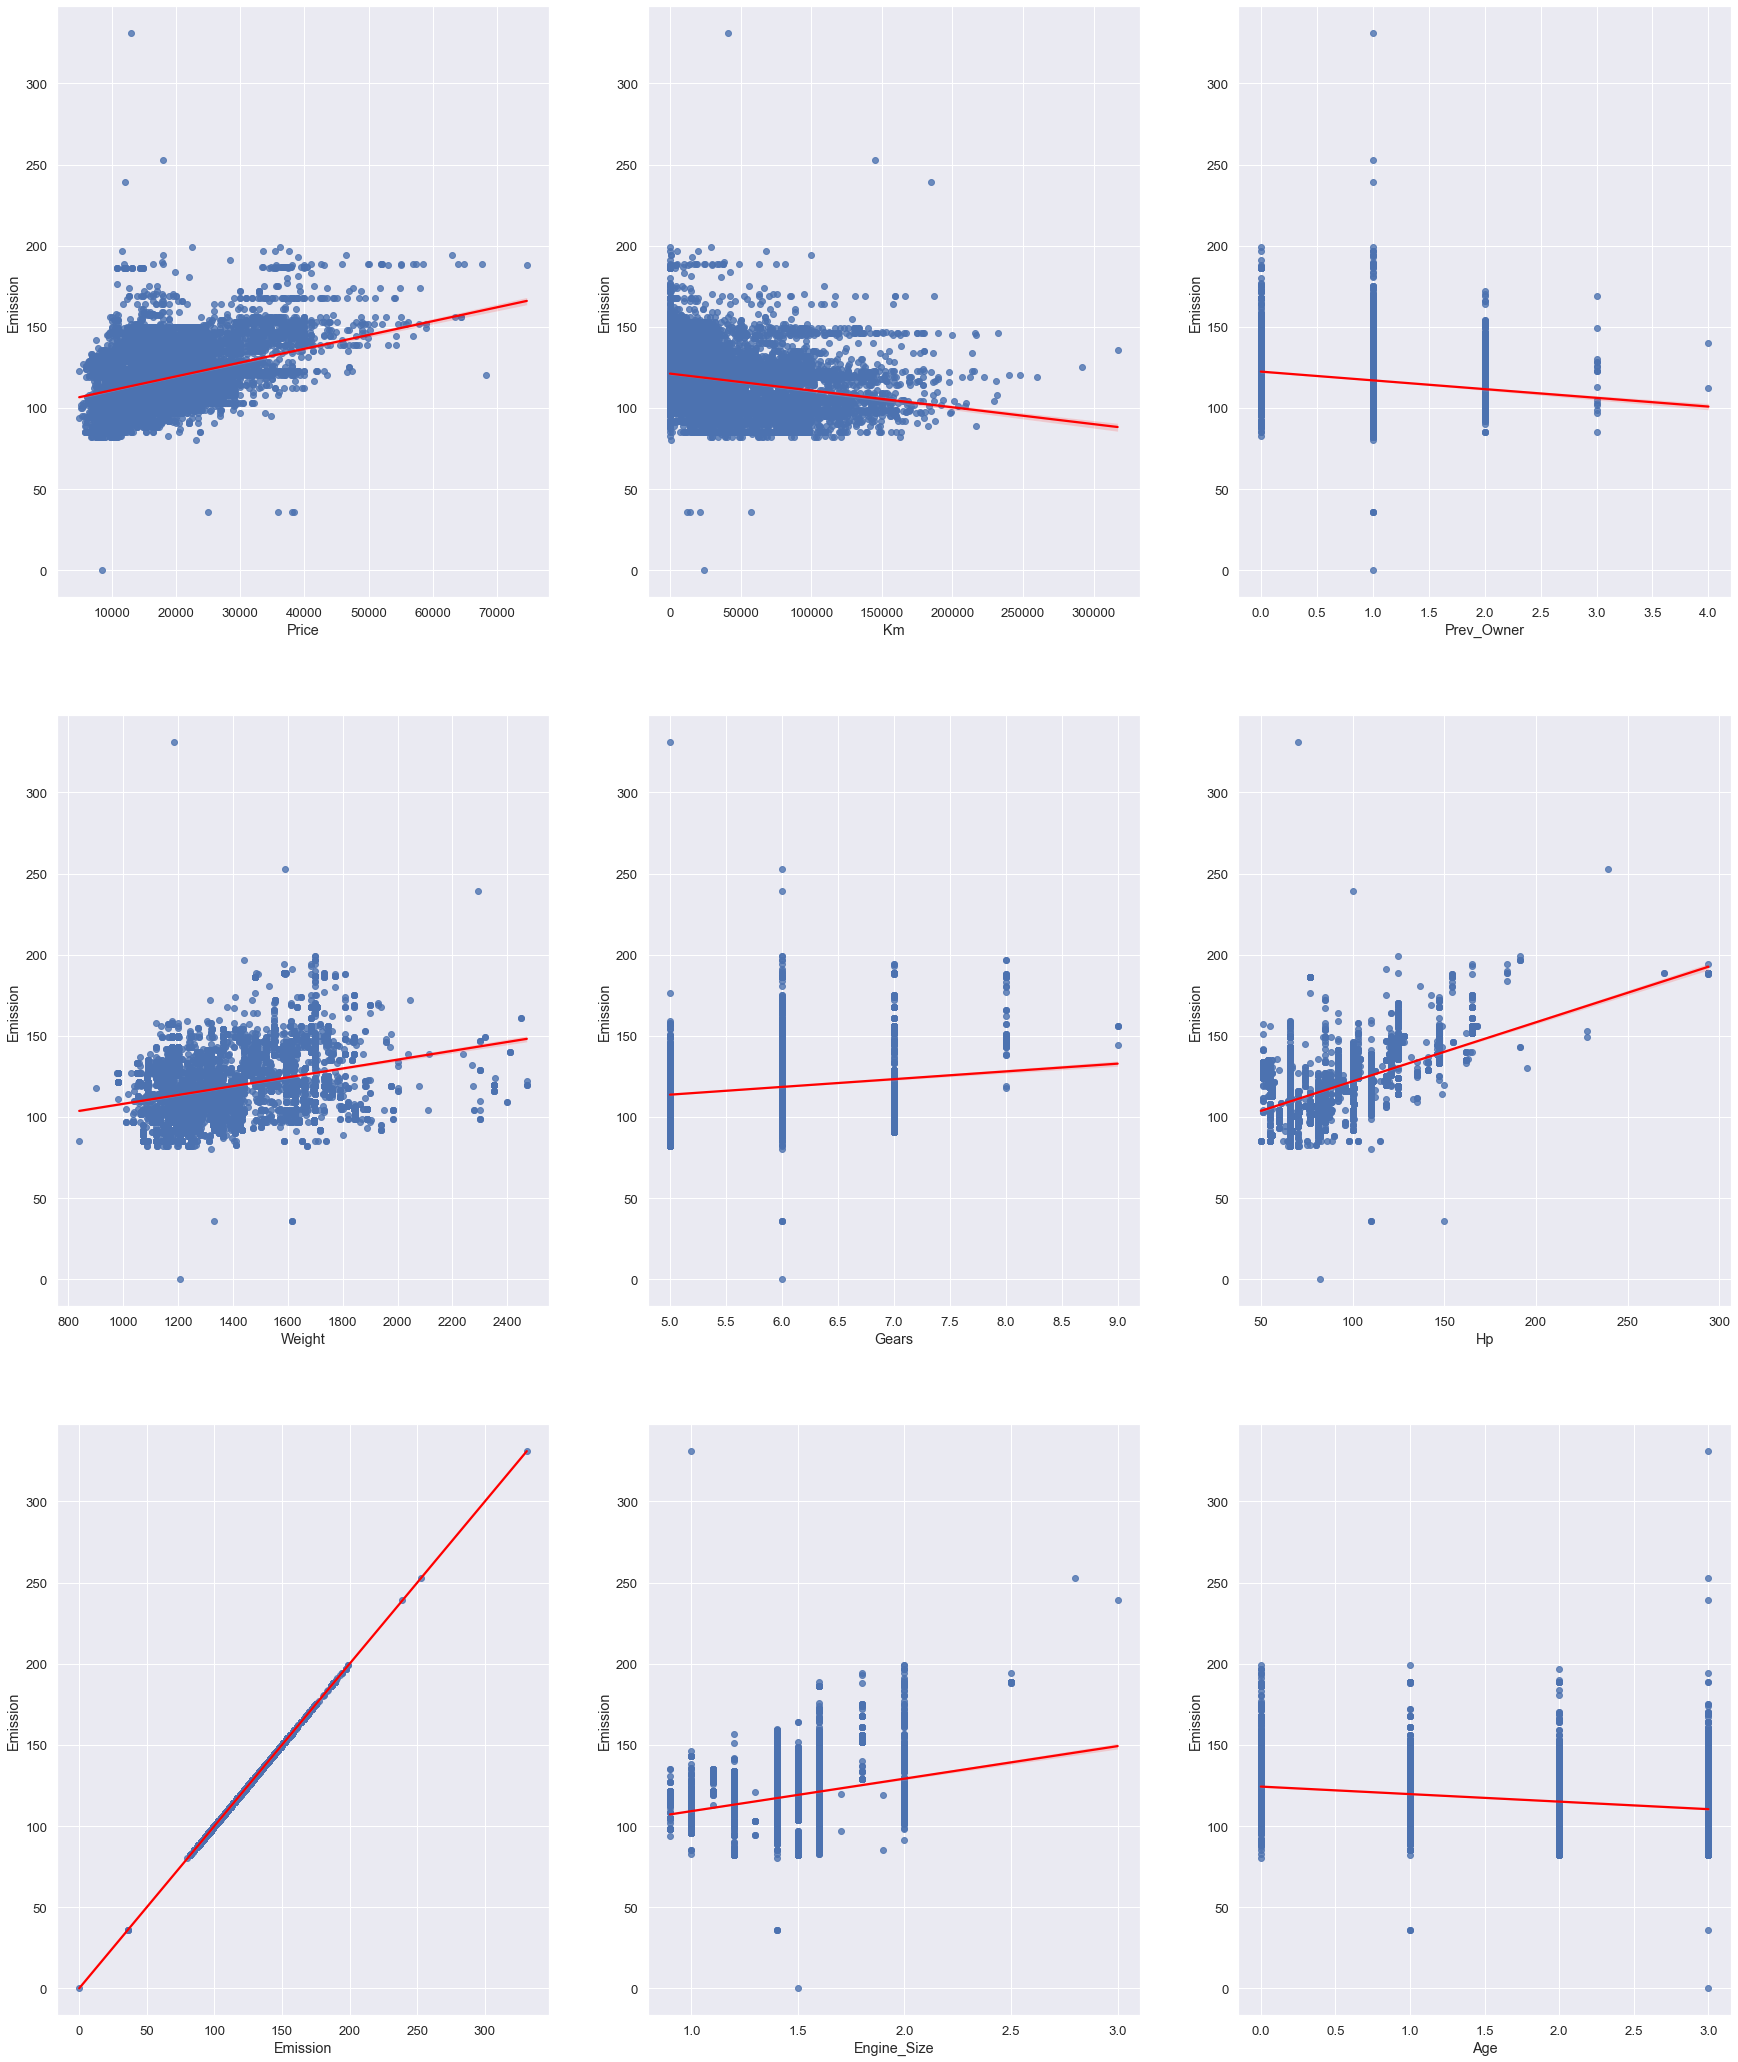

In [37]:
fig = plt.figure(figsize=(30,50))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
        plt.subplot(4,3,i+1)
        sns.regplot(x=col, y= "Emission", data=df, line_kws={"color": "red"})

#### Engine_Size

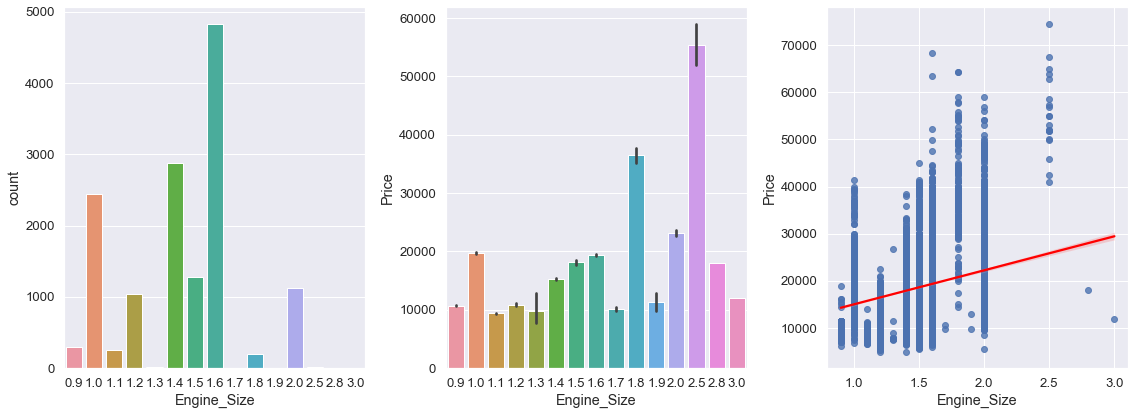

In [38]:
fig, ax = plt.subplots(1,3, figsize = (16,6))
sns.countplot(df["Engine_Size"],ax=ax[0]);
sns.barplot(x="Engine_Size", y="Price", data=df, ax=ax[1]);
sns.regplot(x="Engine_Size", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [39]:
df.corr()["Engine_Size"]

Price          0.279478
Km             0.310522
Prev_Owner     0.130032
Weight         0.632564
Gears          0.431304
Hp             0.610323
Emission       0.317388
Engine_Size    1.000000
Age            0.205700
Name: Engine_Size, dtype: float64

<AxesSubplot:xlabel='Model', ylabel='Price'>

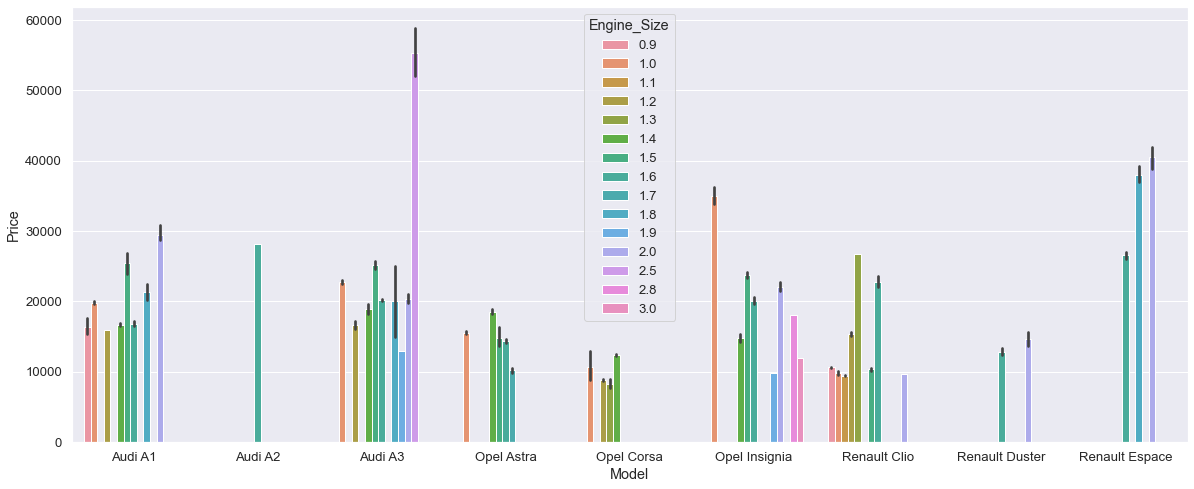

In [40]:
fig = plt.figure(figsize=(20,8))
sns.barplot(x="Model", y="Price", data=df, hue="Engine_Size")

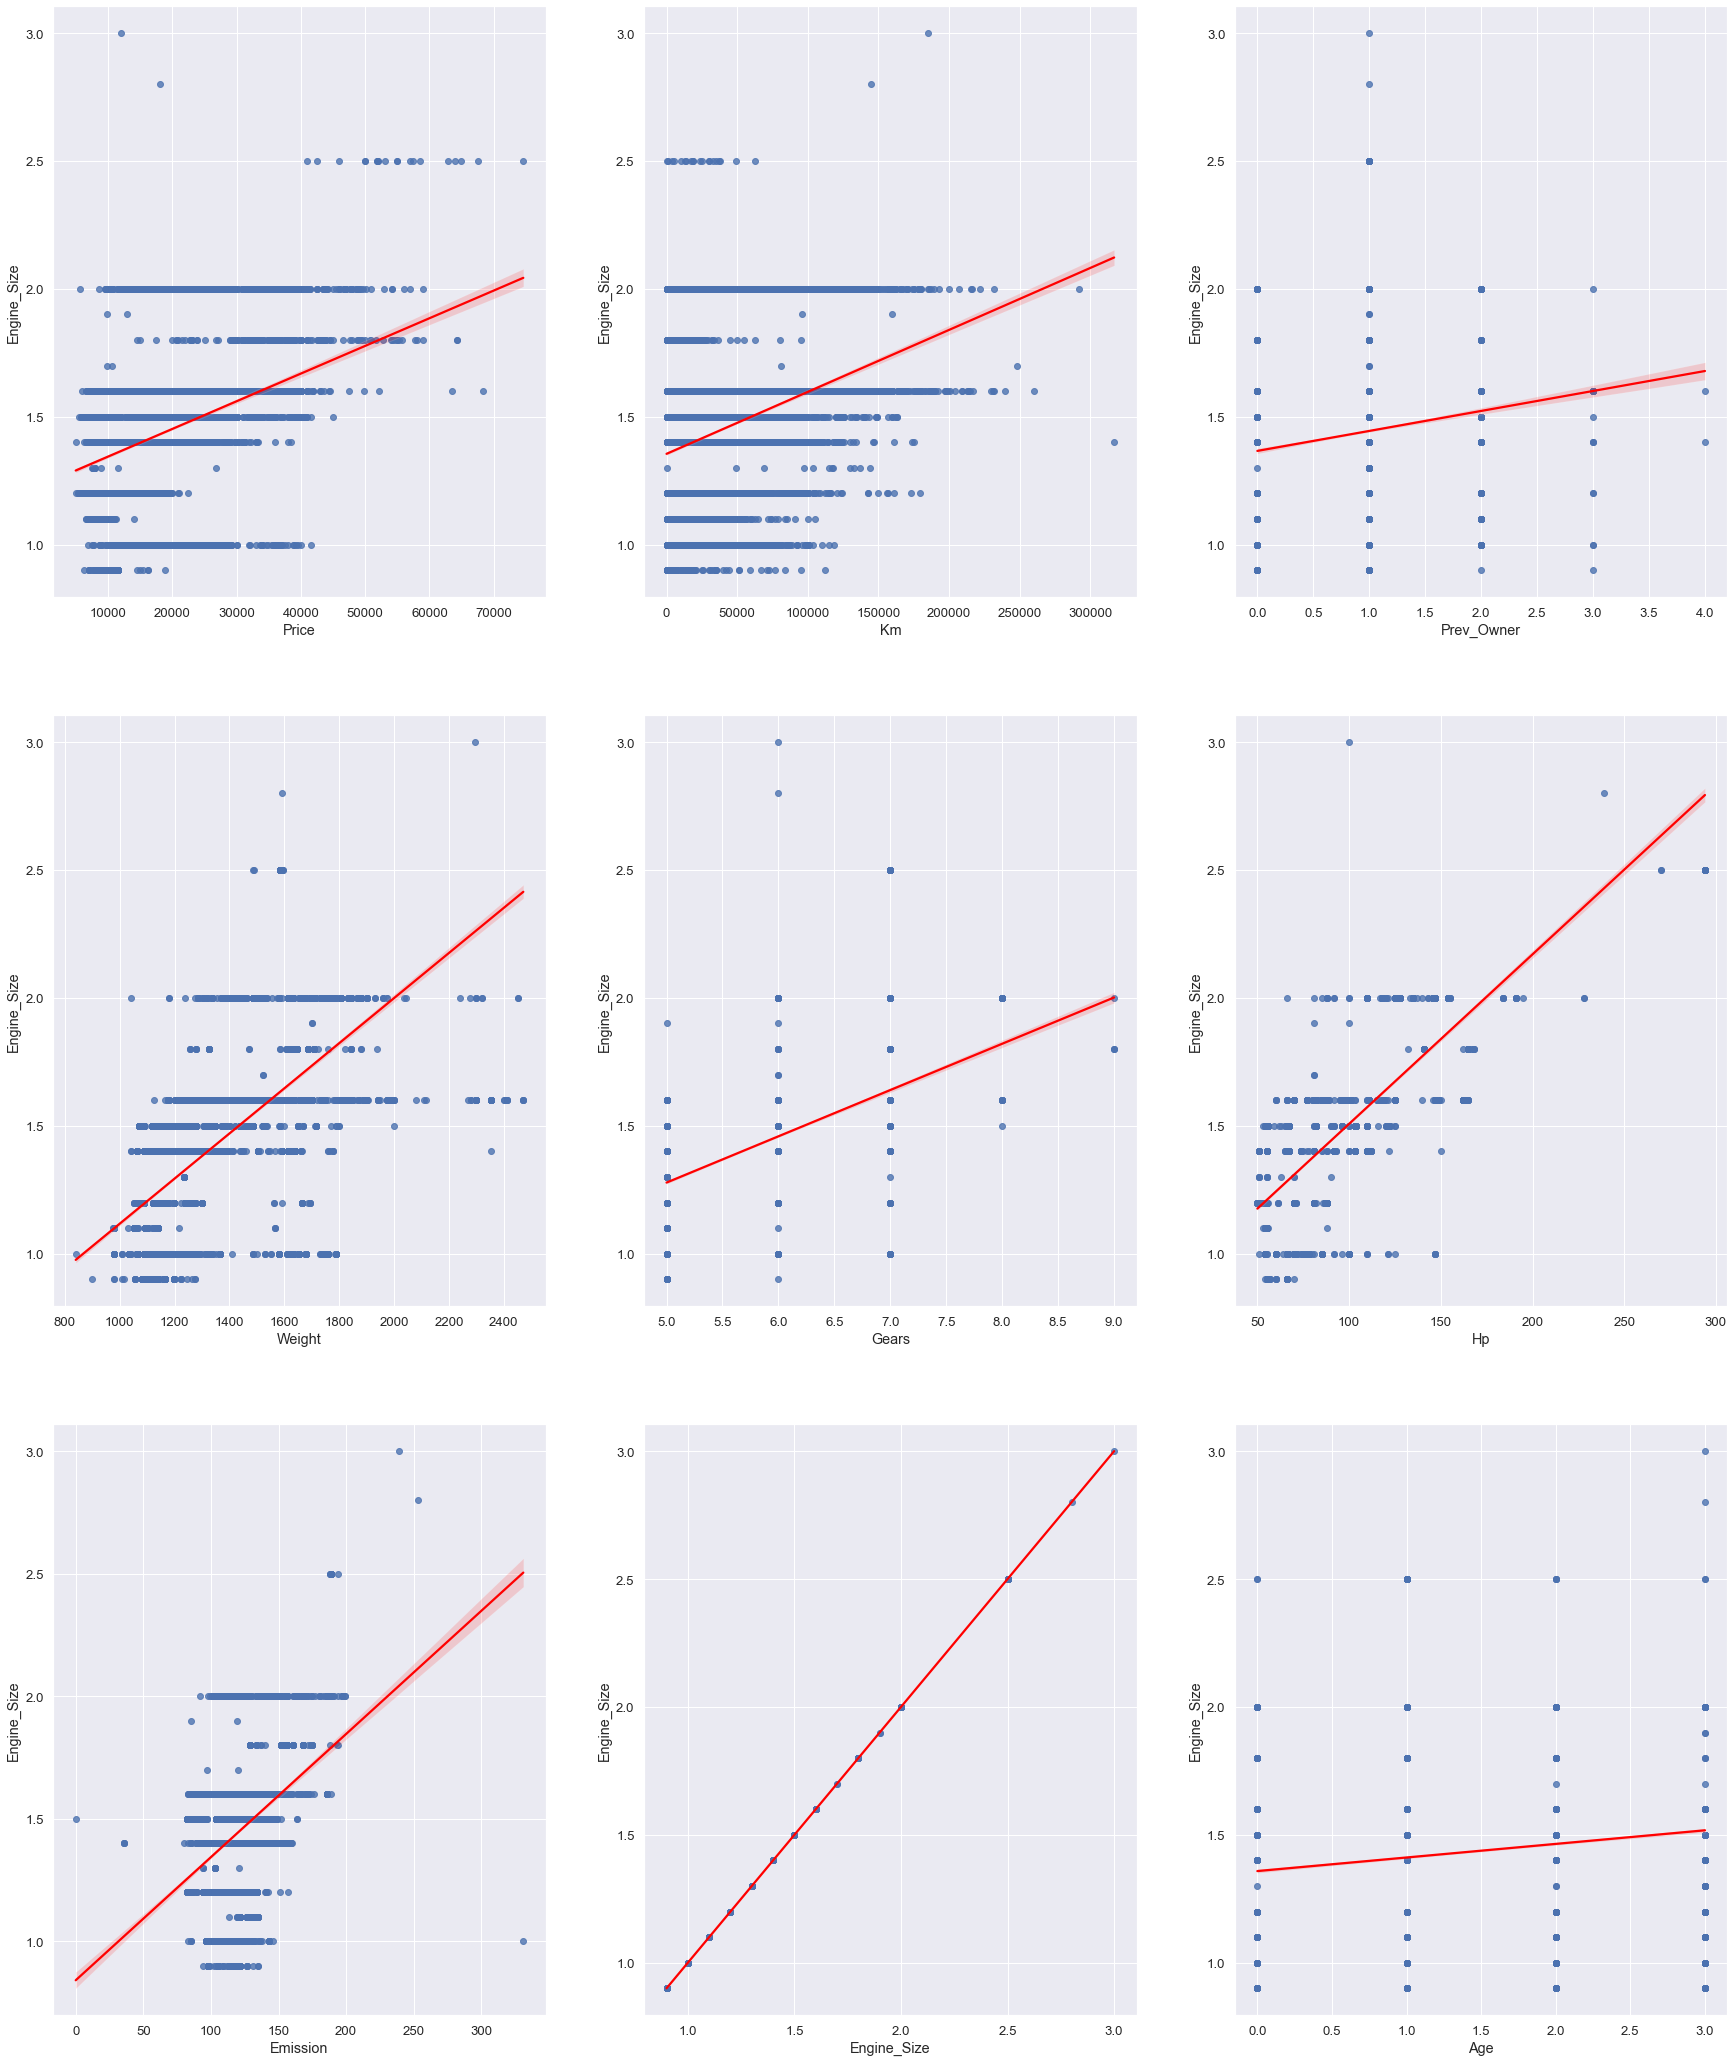

In [41]:
fig = plt.figure(figsize=(30,50))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
        plt.subplot(4,3,i+1)
        sns.regplot(x=col, y= "Engine_Size", data=df, line_kws={"color": "red"})

In [42]:
df.drop(columns="Engine_Size", inplace=True)

#### Age 

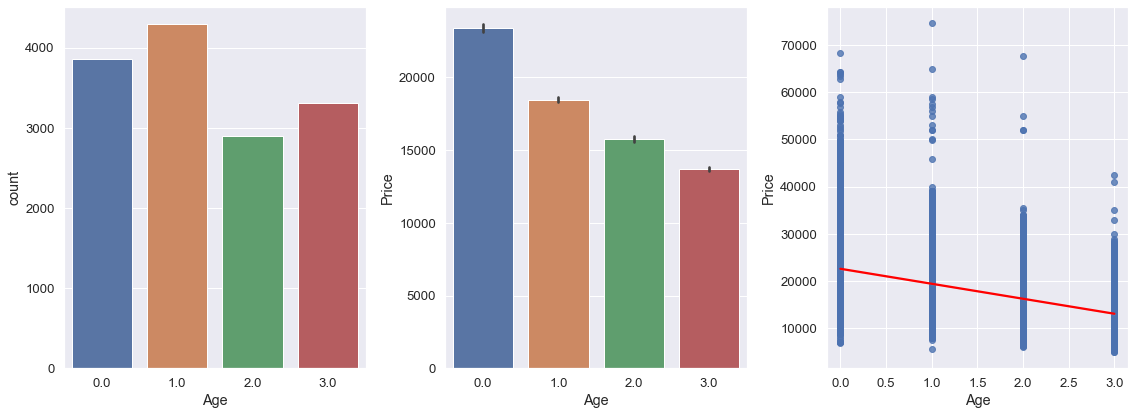

In [43]:
fig, ax = plt.subplots(1,3, figsize = (16,6))
sns.countplot(df["Age"],ax=ax[0]);
sns.barplot(x="Age", y="Price", data=df, ax=ax[1]);
sns.regplot(x="Age", y="Price", data=df, line_kws={"color": "red"}, ax=ax[2]);
plt.tight_layout()

In [44]:
df.corr()["Age"]

Price        -0.476321
Km            0.752683
Prev_Owner    0.584254
Weight        0.084900
Gears        -0.073051
Hp           -0.088347
Emission     -0.284438
Age           1.000000
Name: Age, dtype: float64

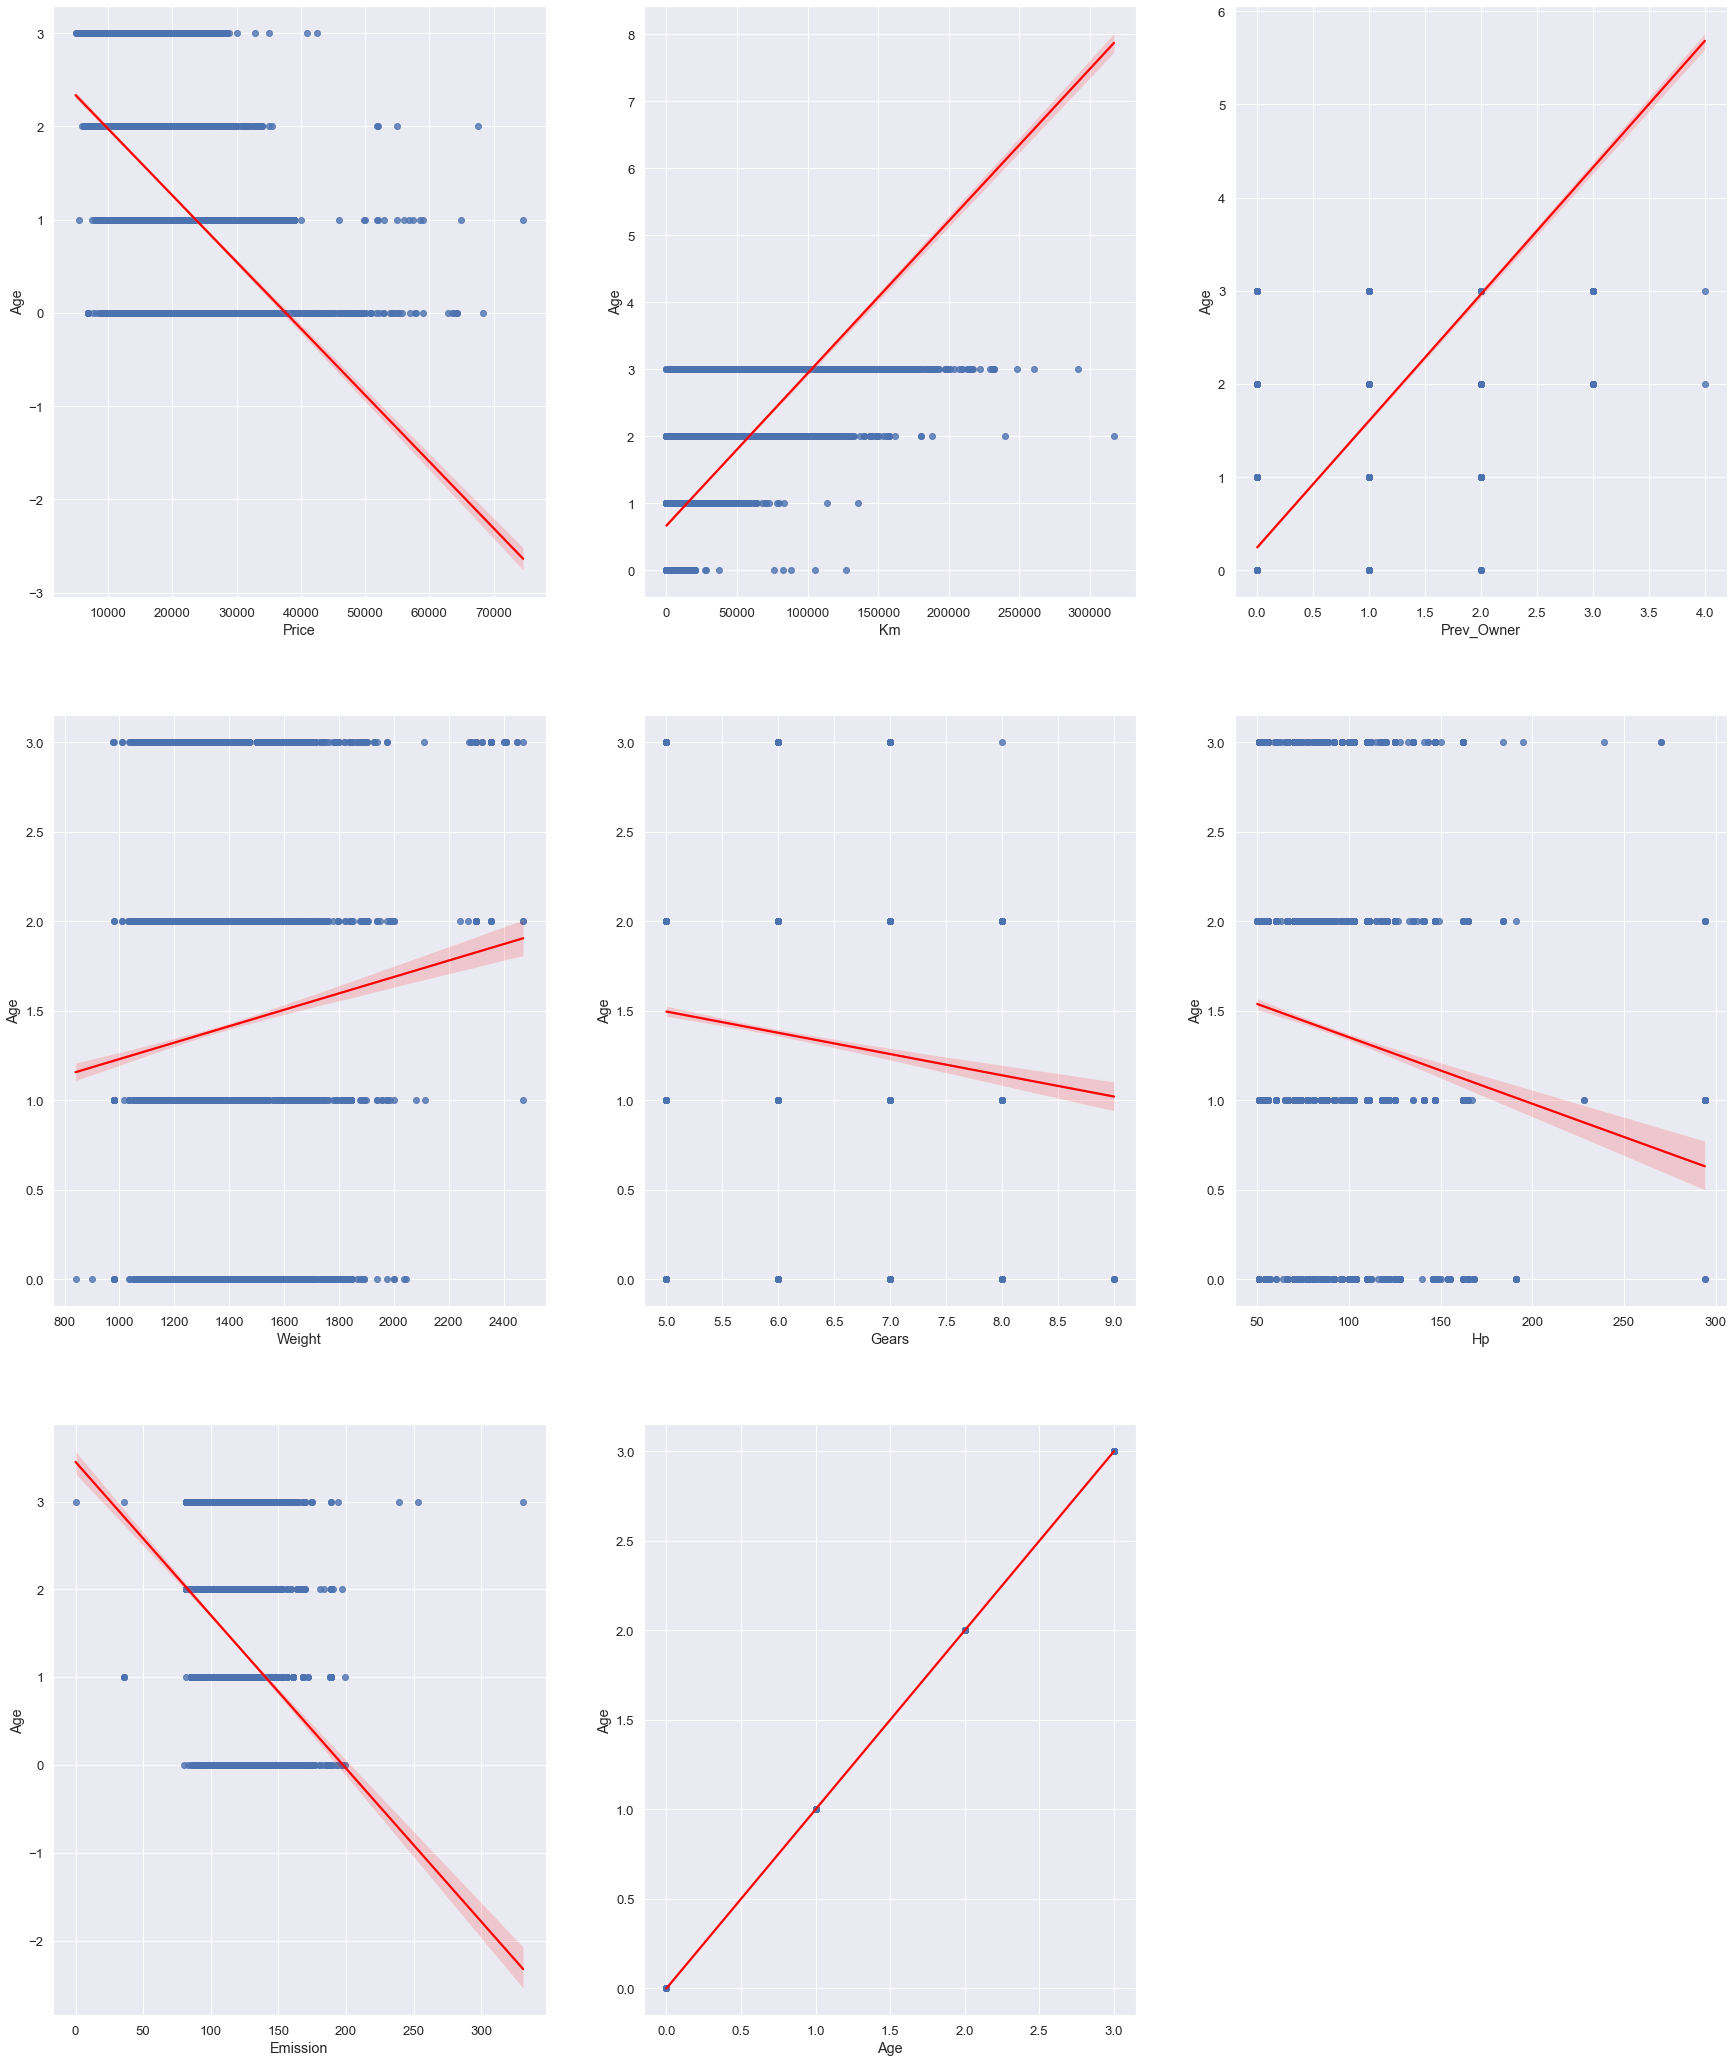

In [45]:
fig = plt.figure(figsize=(30,50))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
        plt.subplot(4,3,i+1)
        sns.regplot(x=col, y= "Age", data=df, line_kws={"color": "red"})

####  END OF THE NUMERICAL FEATURES

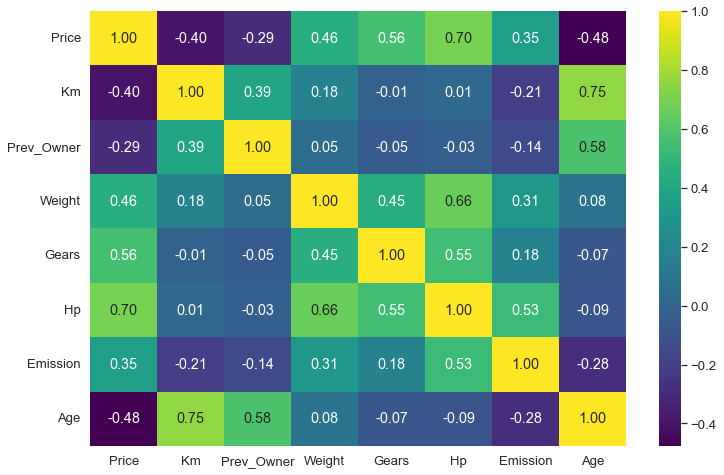

In [46]:
sns.heatmap(df.corr(), annot=True ,fmt=".2f", cmap="viridis");

### Get Dummies

In [47]:
df.select_dtypes(include="O").describe().T

count unique  \
Model                14371      9   
Body_Type            14371      9   
Vat                  14371      3   
Type                 14371      5   
Body_Color           14371     14   
Gear_Type            14371      3   
Drive_Chain          14371      3   
Fuel                 14371      5   
Emission_Class       14371      5   
Comfort_Convenience  14371   6205   
Entertainment_Media  14371    352   
Extras               14371    660   
Safety_Security      14371   4450   
Upholstery_Type      14371      7   

                                                                   top   freq  
Model                                                          Audi A3   2800  
Body_Type                                                       Sedans   7234  
Vat                                                     VAT deductible   9949  
Type                                                              Used  10171  
Body_Color                                                       Black   3636  
Gear_Type                                                       Manual   7297  
Drive_Chain                                                      front  14169  
Fuel                                                           Benzine   7708  
Emission_Class                                                  Euro 6  11979  
Comfort_Convenience  Air conditioning,Electrical side mirrors,Hill ...    180  
Entertainment_Media  Bluetooth,Hands-free equipment,On-board comput...   1207  
Extras                                                    Alloy wheels   5139  
Safety_Security      ABS,Central door lock,Daytime running lights,D...    479  
Upholstery_Type                                                  Cloth   7729

In [48]:
df = df.join(df['Comfort_Convenience'].str.get_dummies(sep=',').add_prefix('CC_'))
df = df.join(df['Entertainment_Media'].str.get_dummies(sep=',').add_prefix('EM_'))
df = df.join(df['Extras'].str.get_dummies(sep=',').add_prefix('E_'))
df = df.join(df['Safety_Security'].str.get_dummies(sep=',').add_prefix('SS_'))
df.head()

Model Body_Type    Price               Vat       Km  Prev_Owner  Type  \
0  Audi A1    Sedans  15770.0    VAT deductible  56013.0         2.0  Used   
1  Audi A1    Sedans  14500.0  Price negotiable  80000.0         1.0  Used   
2  Audi A1    Sedans  14640.0    VAT deductible  83450.0         1.0  Used   
3  Audi A1    Sedans  14500.0       No_Discount  73000.0         1.0  Used   
4  Audi A1    Sedans  16790.0       No_Discount  16200.0         1.0  Used   

  Body_Color  Gear_Type  Weight Drive_Chain     Fuel Emission_Class  \
0      Black  Automatic  1220.0       front   Diesel         Euro 6   
1        Red  Automatic  1255.0       front  Benzine         Euro 6   
2      Black  Automatic  1332.0       front   Diesel         Euro 6   
3      Brown  Automatic  1195.0       front   Diesel         Euro 6   
4      Black  Automatic  1226.0       front   Diesel         Euro 6   

                                 Comfort_Convenience  \
0  Air conditioning,Armrest,Automatic climate con...   
1  Air conditioning,Automatic climate control,Hil...   
2  Air conditioning,Cruise control,Electrical sid...   
3  Air suspension,Armrest,Auxiliary heating,Elect...   
4  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security  Gears     Hp  Emission  \
0  ABS,Central door lock,Daytime running lights,D...    5.0   66.0      99.0   
1  ABS,Central door lock,Central door lock with r...    7.0  141.0     129.0   
2  ABS,Central door lock,Daytime running lights,D...    6.0   85.0      99.0   
3  ABS,Alarm system,Central door lock with remote...    6.0   66.0      99.0   
4  ABS,Central door lock,Driver-side airbag,Elect...    5.0   66.0     109.0   

  Upholstery_Type  Age  CC_Air conditioning  CC_Air suspension  CC_Armrest  \
0           Cloth  3.0                    1                  0           1   
1           Cloth  2.0                    1                  0           0   
2           Cloth  3.0                    1                  0           0   
3         Unknown  3.0                    0                  1           1   
4           Cloth  3.0                    1                  0           1   

   CC_Automatic climate control  CC_Auxiliary heating  CC_Cruise control  \
0                             1                     0                  1   
1                             1                     0                  0   
2                             0                     0                  1   
3                             0                     1                  0   
4                             1                     0                  0   

   CC_Electric Starter  CC_Electric tailgate  CC_Electrical side mirrors  \
0                    0                     0                           1   
1                    0                     0                           0   
2                    0                     0                           1   
3                    0                     0                           1   
4                    0                     0                           1   

   CC_Electrically adjustable seats  CC_Electrically heated windshield  \
0                                 0                                  0   
1                                 0                                  0   
2           

In [49]:
df.drop(columns=["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], inplace=True)

In [50]:
df_final = pd.get_dummies(df)

In [51]:
df_final.head().T

0        1        2        3        4
Price                         15770.0  14500.0  14640.0  14500.0  16790.0
Km                            56013.0  80000.0  83450.0  73000.0  16200.0
Prev_Owner                        2.0      1.0      1.0      1.0      1.0
Weight                         1220.0   1255.0   1332.0   1195.0   1226.0
Gears                             5.0      7.0      6.0      6.0      5.0
...                               ...      ...      ...      ...      ...
Upholstery_Type_Other             0.0      0.0      0.0      0.0      0.0
Upholstery_Type_Part leather      0.0      0.0      0.0      0.0      0.0
Upholstery_Type_Unknown           0.0      0.0      0.0      1.0      0.0
Upholstery_Type_Velour            0.0      0.0      0.0      0.0      0.0
Upholstery_Type_alcantara         0.0      0.0      0.0      0.0      0.0

[165 rows x 5 columns]

## Final 

In [52]:
df_final.to_csv("Auto_Scout_Final", index=False)

In [53]:
pd.read_csv("Auto_Scout_Final")

Price            Km  Prev_Owner  Weight  Gears     Hp  Emission  Age  \
0      15770.0  56013.000000         2.0  1220.0    5.0   66.0      99.0  3.0   
1      14500.0  80000.000000         1.0  1255.0    7.0  141.0     129.0  2.0   
2      14640.0  83450.000000         1.0  1332.0    6.0   85.0      99.0  3.0   
3      14500.0  73000.000000         1.0  1195.0    6.0   66.0      99.0  3.0   
4      16790.0  16200.000000         1.0  1226.0    5.0   66.0     109.0  3.0   
...        ...           ...         ...     ...    ...    ...       ...  ...   
14366  39950.0   1000.000000         1.0  1686.0    7.0  165.0     153.0  0.0   
14367  39950.0     13.135135         0.0  1758.0    6.0  147.0     139.0  0.0   
14368  39885.0   9900.000000         1.0  1708.0    7.0  165.0     168.0  0.0   
14369  39875.0     15.000000         0.0  1808.0    6.0  146.0     139.0  0.0   
14370  40999.0   4560.526316         1.0  1685.0    7.0  165.0     153.0  0.0   

       CC_Air conditioning  CC_Air suspension  CC_Armrest  \
0                        1                  0           1   
1                        1                  0           0   
2                        1                  0           0   
3                        0                  1           1   
4                        1                  0           1   
...                    ...                ...         ...   
14366                    1                  0           1   
14367                    1                  0           0   
14368                    1                  0           0   
14369                    1                  0           1   
14370                    1                  0           0   

       CC_Automatic climate control  CC_Auxiliary heating  CC_Cruise control  \
0                                 1                     0                  1   
1                                 1                     0                  0   
2                                 0                     0                  1   
3                                 0                     1                  0   
4                                 1                     0                  0   
...                             ...                   ...                ...   
14366                             1                     0                  1   
14367                             1                     0                  1   
14368                             1                     0                  1   
14369                             1                     0                  1   
14370                             1                     0                  1   

       CC_Electric Starter  CC_Electric tailgate  CC_Electrical side mirrors  \
0                        0                     0                           1   
1                        0                     0                           0   
2                        0                     0                           1   
3                        0                     0                           1   
4                        0                     0                           1   
...                    ...                   ...                         ...   
14366                    0                     1                           1   
14367                    0                     0                           1   
14368                    0                     1                           1   
14369                    0                     1                           1   
14370                    0                     1                           1   

       CC_Electrically adjustable seats  CC_Electrically heated windshield  \
0                                     0                                  0   
1                                     0                                  0   
2                                     0                                  0   
3                                     0                              